In [2]:
# import time
import os
from skimage import io
import scipy as sp
import numpy as np
# import sys
import openpnm as op
import porespy as ps
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rcParams
np.set_printoptions(precision=4)
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import math
import pickle
import seaborn as sns

In [3]:
print(op.__version__)
print(ps.__version__)

3.5.0
2.4.3


In [4]:
# Matplotlib plotting controls
plt.rc('axes', linewidth=2)
plt.rc('font', weight='bold')
params = {'figure.autolayout': True,
          'figure.titleweight': 'bold',
          'font.weight': 'bold',
          'font.size': 14,
          'font.family': 'sans-serif',
          'font.sans-serif': 'Arial',
          'legend.fontsize': 12,
#           'legend.title_fontsize':10,
          'figure.figsize': (6, 5),
          'figure.titlesize': 14,
          'axes.labelsize': 12,
          'axes.labelweight': 'bold',
          'axes.titlesize': 14,
          'axes.linewidth': 2,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.top': True,
          'xtick.bottom': True,
          'xtick.labeltop': False,
          'xtick.labelbottom': True,
          'ytick.left': True,
          'ytick.right': True,
          'ytick.labelright': False,
          'ytick.labelleft': True,
          'ytick.major.size': 5.5,
          'ytick.major.width': 0.8,
          'xtick.major.size': 5.5,
          'xtick.major.width': 0.8,
          'ytick.minor.size': 3.5,
          'ytick.minor.width': 0.6,
          'xtick.minor.size': 3.5,
          'xtick.minor.width': 0.6,
        'xtick.minor.visible':True,
         'ytick.minor.visible':True}
rcParams.update(params)

# Step1: Read in files and prep work

In [5]:
#Read in all tif stacks

voxel_size = 6e-9

numSamples = 3
numRegions = 6

sampleNames = ['pris','uncomp','comp']
regionIndicators = list(range(1,numRegions+1))

im = []

path = 'data/1p2um volumes/'
for i,x in enumerate(sampleNames):
    im_temp = []
    for j,y in enumerate(regionIndicators):
        im_temp.append(io.imread(path+x+'_1p2um/'+x+'_1p2um_'+str(y)+'.tif'))
    im.append(im_temp)
        
#separate solid and void
im_solid = []
im_void = []

for i,x in enumerate(im):
    solid_temp = []
    void_temp = []
    for j, y in enumerate(x):
        solid_temp.append(y != 0)
        void_temp.append(y == 0)
    im_solid.append(solid_temp)
    im_void.append(void_temp)

im_solid = np.array(im_solid)
im_void = np.array(im_void)

im_total = [im_solid, im_void]
im_total = np.array(im_total)

#check
print('im_solid array shape:', im_solid.shape)
print('im_void array shape:',im_void.shape)
print()
print('im_total array shape:',im_total.shape)

im_solid array shape: (3, 6, 200, 200, 200)
im_void array shape: (3, 6, 200, 200, 200)

im_total array shape: (2, 3, 6, 200, 200, 200)


In [6]:
# directions = [['xmin','xmax'],['ymin','ymax'],['zmin','zmax']]

# tort_sims = []
# for b,bin in enumerate(im_total):
#     bin_temp = []
#     for s,sample in enumerate(bin):
#         sample_temp = []
#         for r,region in enumerate(sample):
#             region_temp = []
#             for d, direction in enumerate(directions):
#                 dir_temp = ps.simulations.tortuosity_fd(region,d)
#                 region_temp.append(dir_temp)

#             sample_temp.append(region_temp)
#         bin_temp.append(sample_temp)
#     tort_sims.append(bin_temp)

In [7]:
# region=im_total[0][0][0]
# test = ps.simulations.tortuosity_fd(region,0)


# print(test)
# kf = test.effective_porosity/test.tortuosity
# print(kf)

In [8]:
# #Run Snow algorithm for pore network extraction 
# #https://porespy.org/modules/generated/generated/porespy.networks.snow2.html#porespy.networks.snow2


# snow_solid = []
# for x in (im_solid):
#     snow_temp = []
#     for y in x:
#         snow_temp.append(ps.networks.snow2(y, accuracy='standard', voxel_size=voxel_size))
#     snow_solid.append(snow_temp)
    
# snow_void = []
# for x in (im_void):
#     snow_temp = []
#     for y in x:
#         snow_temp.append(ps.networks.snow2(y, accuracy='standard', voxel_size=voxel_size))
#     snow_void.append(snow_temp)



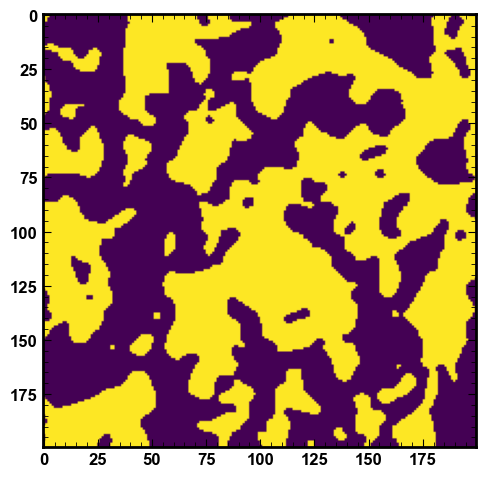

In [9]:
### testing changes to snow alg call

im_test = im_void[0][0]
im_test = im_test + 1
# im_test
plt.imshow(im_test[:,100,:])

In [10]:
# snow_test = ps.networks.snow2(im_test, accuracy='standard', voxel_size=voxel_size)

In [11]:
# print(snow_test.network)

In [12]:
# pn_test = ps.networks.regions_to_network(snow_test.regions)

In [13]:
# print(snow_test)

In [14]:
# # #Store the snow network extractions to save computational time if notebook restarts
# %store snow_solid
# %store snow_void

In [15]:
#Restore the snow network extractions if needed
%store -r snow_solid
%store -r snow_void

In [16]:
# fig, (ax1,ax2) = plt.subplots(1,2,figsize=[10, 5])

# ax1.imshow(ps.tools.randomize_colors(snow_test.regions[:,100,:]),cmap='nipy_spectral_r')

# snow_compare = snow_void[0][0]
# ax2.imshow(ps.tools.randomize_colors(snow_compare.regions[:,100,:]),cmap='nipy_spectral_r')



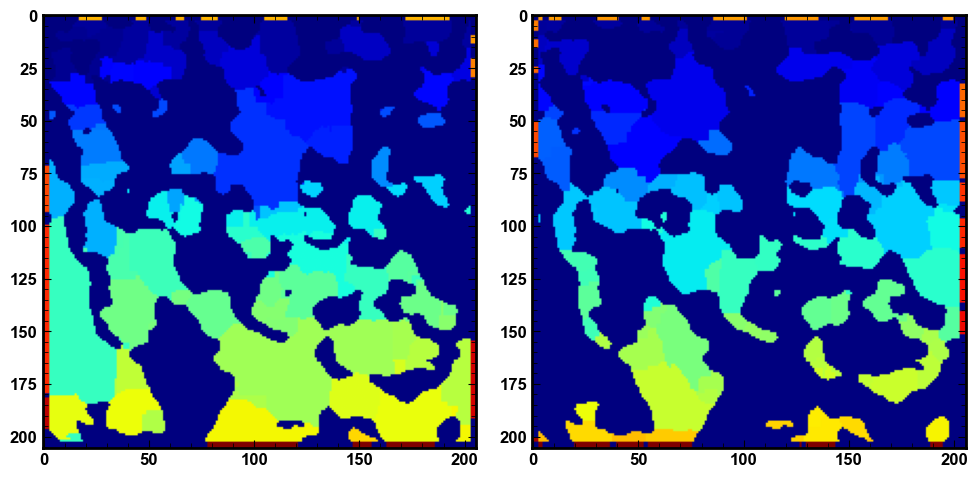

In [17]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[10, 5])

ax1.imshow(snow_void[1][0].regions[:,100,:],cmap='jet')
ax2.imshow(snow_solid[1][0].regions[:,100,:],cmap='jet')

In [13]:
snow_solid_networks = [[obj.network for obj in sublist] for sublist in snow_solid]
snow_void_networks = [[obj.network for obj in sublist] for sublist in snow_void]

path = './data/1p2um volumes/'

with open(path+"snow_solid_1p2um_networks.pkl", "wb") as f:
    pickle.dump(snow_solid_networks, f)

with open(path+"snow_void_1p2um_networks.pkl", "wb") as f:
    pickle.dump(snow_void_networks, f)

In [524]:
path = './data/1p2um volumes/'

with open(path+"snow_solid_1p2um_networks.pkl", "rb") as f:
    snow_solid_networks = pickle.load(f)

with open(path+"snow_void_1p2um_networks.pkl", "rb") as f:
    snow_void_networks = pickle.load(f)

snow_total_networks = [snow_solid_networks,snow_void_networks]

In [19]:
#Create OpenPNM project objects
pn_solid = []
pn_void = []

for x in snow_solid_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_solid.append(pn_temp)
    
for x in snow_void_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [436]:
s = 0
r = 0


In [665]:
# Reset region
s = 0
r = 0
print(snow_void_networks[s][r]['pore.equivalent_diameter'])
print(snow_void_networks[s][r]['pore.extended_diameter'])
print(snow_void_networks[s][r]['pore.inscribed_diameter'])
print(snow_void_networks[s][r]['pore.volume'])

print((np.pi*snow_void_networks[s][r]['pore.equivalent_diameter']**3/6))
print((np.pi*snow_void_networks[s][r]['pore.extended_diameter']**3/6))
print((np.pi*snow_void_networks[s][r]['pore.inscribed_diameter']**3/6))



region = op.io.network_from_porespy(snow_void_networks[s][r])

print(region)

[3.2472e-08 1.2122e-07 2.7191e-07 ... 3.4437e-08 3.2602e-08 2.5876e-08]
[6.0000e-08 1.0461e-07 3.2820e-07 ... 6.9971e-08 4.8000e-08 6.0000e-08]
[2.4000e-08 7.9599e-08 1.3200e-07 ... 2.4000e-08 2.4000e-08 1.6971e-08]
[1.7928e-23 9.3269e-22 1.0526e-20 ... 2.1384e-23 1.8144e-23 9.0720e-24]
[1.7928e-23 9.3269e-22 1.0526e-20 ... 2.1384e-23 1.8144e-23 9.0720e-24]
[1.1310e-22 5.9946e-22 1.8510e-20 ... 1.7937e-22 5.7906e-23 1.1310e-22]
[7.2382e-24 2.6407e-22 1.2043e-21 ... 7.2382e-24 7.2382e-24 2.5591e-24]

══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Network at 0x63fdedbc0>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  throat.conns                                                  3307 / 3307
  3  pore.coords                                     

In [18]:
inlets = region.pores('xmin')
outlets = region.pores('xmax')
area_test = op.topotools.get_domain_area(region,inlets=inlets,outlets=outlets)
print(area_test)

length_test = op.topotools.get_domain_length(region,inlets=inlets,outlets=outlets)
print(length_test)


NameError: name 'region' is not defined

In [104]:
# test = ps.simulations.tortuosity_fd(im_void[s][r],0)
# print(test)
# kf = test.effective_porosity/test.tortuosity
# print(kf)

# test1 = ps.simulations.tortuosity_fd(im_void[s][r],1)
# print(test1)
# kf1 = test1.effective_porosity/test1.tortuosity
# print(kf1)

# test2 = ps.simulations.tortuosity_fd(im_void[s][r],2)
# print(test2)
# kf2 = test2.effective_porosity/test2.tortuosity
# print(kf2)

In [20]:
op.visualization.plot_notebook(region,
                               node_size=region['pore.equivalent_diameter'],
                               node_color=region['pore.extended_diameter'],
                               colormap='jet',
                               node_scale=2*10**8,
                               edge_scale=0.0001
                               )

In [325]:
import openpnm.models as mods

spheres_and_cylinders_KF = {
    # 'pore.seed': {
    #     'model': mods.misc.random,
    #     'element': 'pore',
    #     'num_range': [0.2, 0.7],
    #     'seed': None,
    # },
    'pore.max_size': {
        'model': mods.geometry.pore_size.largest_sphere,
        'iters': 10,
    },
    'pore.diameter': {
        # 'model': mods.misc.product,
        # 'props': ['pore.max_size', 'pore.seed'],
        'model': mods.misc.scaled,
        'factor': 0.9,
        'prop': 'pore.max_size',
    },
    'pore.volume': {
        'model': mods.geometry.pore_volume.sphere,
        'pore_diameter': 'pore.diameter',
    },
    'throat.max_size': {
        'model': mods.misc.from_neighbor_pores,
        'mode': 'min',
        'prop': 'pore.diameter',
    },
    'throat.diameter': {
        'model': mods.misc.scaled,
        'factor': 0.8,
        'prop': 'throat.max_size',
    },
    'throat.length': {
        'model': mods.geometry.throat_length.spheres_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
    'throat.cross_sectional_area': {
        'model': mods.geometry.throat_cross_sectional_area.cylinder,
        'throat_diameter': 'throat.diameter',
    },
    'throat.total_volume': {
        'model': mods.geometry.throat_volume.cylinder,
        'throat_diameter': 'throat.diameter',
        'throat_length': 'throat.length',
    },
    'throat.lens_volume': {
        'model': mods.geometry.throat_volume.lens,
        'throat_diameter': 'throat.diameter',
        'pore_diameter': 'pore.diameter',
    },
    'throat.volume': {
        'model': mods.misc.difference,
        'props': ['throat.total_volume', 'throat.lens_volume'],
    },
    'throat.diffusive_size_factors': {
        'model': mods.geometry.diffusive_size_factors.spheres_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
    'throat.hydraulic_size_factors': {
        'model': mods.geometry.hydraulic_size_factors.spheres_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
}


In [326]:
# Reset region
s = 0
r = 0
region = op.io.network_from_porespy(snow_void_networks[s][r])
h = op.utils.check_network_health(region)
# print(h)
op.topotools.trim(network=region, pores=h['disconnected_pores'])
h = op.utils.check_network_health(region)
# print(h);

region.add_model_collection(spheres_and_cylinders_KF)
region.regenerate_models()


phase = op.phase.Phase(network=region)
phase['pore.diffusivity'] = 1

region['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive(phase)

In [327]:
print(np.sum(region['pore.volume']))

4.784294831042505e-19


In [328]:
op.visualization.plot_notebook(region,
                               node_size=region['pore.diameter'],
                               node_color=region['pore.diameter'],
                               colormap='jet',
                               node_scale=2*10**8,
                               edge_scale=0.0001
                               )

In [329]:
inlet = region.pores('xmax')
outlet = region.pores('xmin')
Diff = op.algorithms.FickianDiffusion(network=region, phase=phase)
C_in, C_out = [1, 0]
Diff.set_value_BC(pores=inlet, values=C_in)
Diff.set_value_BC(pores=outlet, values=C_out)
Diff.run()

In [330]:
print(Diff)


══════════════════════════════════════════════════════════════════════════════
fick_02 : <openpnm.algorithms.FickianDiffusion at 0x19b1e6b10>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.bc.rate                                                     0 / 1669
  3  pore.bc.value                                                  185 / 1669
  4  pore.concentration                                            1669 / 1669
  5  pore.initial_guess                                            1669 / 1669
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                      

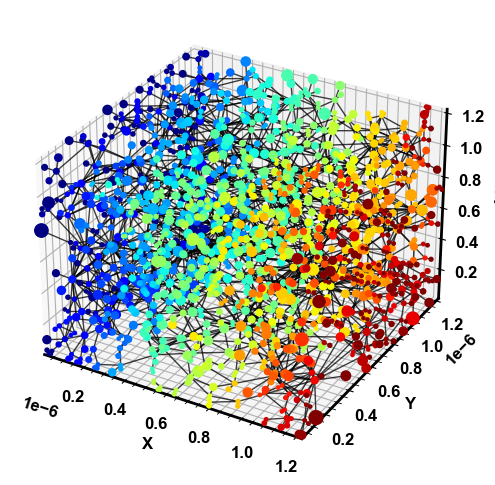

In [331]:
import matplotlib as mpl


fig, ax = plt.subplots(figsize=[5, 5])

colors = Diff['pore.concentration']
op.visualization.plot_connections(ax=ax,
                                network=region,
                                alpha=0.75, linewidth=1,color='k',
                                  )
op.visualization.plot_coordinates(ax=ax,
                                network=region,
                                size_by=region["pore.diameter"],
                                color_by=colors, 
                                markersize=100)


norm = mpl.colors.Normalize(vmin=colors.min(), vmax=colors.max())
sm = mpl.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])  # required for matplotlib < 3.6
# plt.axis('off')

# cbar = fig.colorbar(sm,ax=ax)
# cbar.set_label("Concentration")
plt.show()

In [332]:

op.visualization.plot_notebook(region,
                               node_size=region['pore.diameter'],
                               node_color=Diff['pore.concentration'],
                               colormap='jet',
                               node_scale=2*10**8,
                               edge_scale=0.0001
                               )

In [333]:
print(region.project)

══════════════════════════════════════════════════════════════════════════════
Object Name : Object Class and ID
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
net : <openpnm.network.Network at 0x19b3867a0>
phase_01 : <openpnm.phase.Phase at 0x19bb8f060>
fick_02 : <openpnm.algorithms.FickianDiffusion at 0x19b1e6b10>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [334]:
current_directory = os.getcwd()
op.io._vtk.project_to_vtk(region.project,filename=current_directory+'/ParaView/Paraview_test')

In [335]:
print((region['throat.diffusive_size_factors'][:,1]))

with open("output.txt", "w") as f:
    for item in phase['throat.diffusive_conductance']:
        f.write(str(item) + "\n")

[2.2651e-09 2.0113e-08 1.8011e-08 ... 1.3678e-08 1.3060e-08 1.4140e-08]


In [336]:
# NBVAL_IGNORE_OUTPUT
R = Diff.rate(pores=inlet,mode='group')
print(R)
R = np.sum(R)
print(R)

L = im_total[0][0][0].shape[0]*voxel_size

# area of inlet (and outlet)
A = (im_total[0][0][0].shape[(0+1)%3]*voxel_size)*(im_total[0][0][0].shape[(0+2)%3]*voxel_size)
pore_area = np.pi * (region['pore.diameter']/2.0)**2
inlet_area_sum = np.sum(pore_area[inlet])
# A = inlet_area_sum

print(A)
print(L)
D_eff = R * (L) / (A) / (C_in - C_out)
F = D_eff/phase['pore.diffusivity'][0]
print(f'Formation factor is: {F:.4f}')

[1.4648e-07]
1.4647656725739615e-07
1.44e-12
1.2e-06
Formation factor is: 0.1221


# Formation Factor

In [290]:
import openpnm.models as mods

spheres_and_cylinders_KF = {
    # 'pore.seed': {
    #     'model': mods.misc.random,
    #     'element': 'pore',
    #     'num_range': [0.2, 0.7],
    #     'seed': None,
    # },
    'pore.max_size': {
        'model': mods.geometry.pore_size.largest_sphere,
        'iters': 10,
    },
    'pore.diameter': {
        # 'model': mods.misc.product,
        # 'props': ['pore.max_size', 'pore.seed'],
        'model': mods.misc.scaled,
        'factor': 1,
        'prop': 'pore.max_size',
    },
    'pore.volume': {
        'model': mods.geometry.pore_volume.sphere,
        'pore_diameter': 'pore.diameter',
    },
    'throat.max_size': {
        'model': mods.misc.from_neighbor_pores,
        'mode': 'min',
        'prop': 'pore.diameter',
    },
    'throat.diameter': {
        'model': mods.misc.scaled,
        'factor': 0.99,
        'prop': 'throat.max_size',
    },
    'throat.length': {
        'model': mods.geometry.throat_length.spheres_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
    'throat.cross_sectional_area': {
        'model': mods.geometry.throat_cross_sectional_area.cylinder,
        'throat_diameter': 'throat.diameter',
    },
    'throat.total_volume': {
        'model': mods.geometry.throat_volume.cylinder,
        'throat_diameter': 'throat.diameter',
        'throat_length': 'throat.length',
    },
    'throat.lens_volume': {
        'model': mods.geometry.throat_volume.lens,
        'throat_diameter': 'throat.diameter',
        'pore_diameter': 'pore.diameter',
    },
    'throat.volume': {
        'model': mods.misc.difference,
        'props': ['throat.total_volume', 'throat.lens_volume'],
    },
    'throat.diffusive_size_factors': {
        'model': mods.geometry.diffusive_size_factors.spheres_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
    'throat.hydraulic_size_factors': {
        'model': mods.geometry.hydraulic_size_factors.spheres_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
}


In [157]:
import openpnm.models as mods


cones_and_cylinders_KF = {
    # 'pore.seed': {
    #     'model': mods.misc.random,
    #     'element': 'pore',
    #     'num_range': [0.2, 0.7],
    #     'seed': None,
    # },
    'pore.max_size': {
        'model': mods.geometry.pore_size.largest_sphere,
        'iters': 10,
    },
    'pore.diameter': {
        # 'model': mods.misc.product,
        # 'props': ['pore.max_size', 'pore.seed'],
        'model': mods.misc.scaled,
        'factor': 1,
        'prop': 'pore.max_size',
    },
    'pore.volume': {
        'model': mods.geometry.pore_volume.sphere,
        'pore_diameter': 'pore.diameter',
    },
    'throat.max_size': {
        'model': mods.misc.from_neighbor_pores,
        'mode': 'min',
        'prop': 'pore.diameter',
    },
    'throat.diameter': {
        'model': mods.misc.scaled,
        'factor': 0.8,
        'prop': 'throat.max_size',
    },
    'throat.length': {
        'model': mods.geometry.throat_length.cones_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
    'throat.volume': {
        'model': mods.geometry.throat_volume.cylinder,
        'throat_diameter': 'throat.diameter',
        'throat_length': 'throat.length',
    },
    'throat.cross_sectional_area': {
        'model': mods.geometry.throat_cross_sectional_area.cylinder,
        'throat_diameter': 'throat.diameter',
    },
    'throat.diffusive_size_factors': {
        'model': mods.geometry.diffusive_size_factors.cones_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
    'throat.hydraulic_size_factors': {
        'model': mods.geometry.hydraulic_size_factors.cones_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
}

In [119]:
# Reinitialize networks
pn_solid = []
pn_void = []

for x in snow_solid_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_solid.append(pn_temp)
    
for x in snow_void_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [120]:
print(pn_total[0][0][0])


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Network at 0x1822b2b10>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  throat.conns                                                  4294 / 4294
  3  pore.coords                                                   1904 / 1904
  4  pore.region_label                                             1904 / 1904
  5  pore.phase                                                    1904 / 1904
  6  throat.phases                                                 4294 / 4294
  7  pore.region_volume                                            1904 / 1904
  8  pore.equivalent_diameter                                      1904 / 1904
  9  pore.local_peak                                               1904 / 1904
 10 

In [121]:
phases = []
Diffs = []
formfactors = []
total_volumes = []
for b,bin in enumerate(pn_total):
    bin_phases = []
    bin_Diffs = []
    bin_formfactors = []
    bin_total_volume = []
    for s,sample in enumerate(bin):
        sample_phases = []
        sample_Diffs = []
        sample_formfactors = []
        sample_total_volume = []
        for r,region in enumerate(sample):

            h = op.utils.check_network_health(region)
            # print(h)
            op.topotools.trim(network=region, pores=h['disconnected_pores'])
            h = op.utils.check_network_health(region)
            # print(h);

            # region.add_model_collection(spheres_and_cylinders_KF)
            # region.add_model_collection(cones_and_cylinders_KF)
            # region.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)

            region['pore.diameter'] = region['pore.equivalent_diameter']
            region['throat.diameter'] = region['throat.inscribed_diameter']
            # region['throat.diameter'] = op.models.geometry.throat_size.from_neighbor_pores(region,prop='pore.diameter',mode='min')
            # region['throat.diameter'] = region['throat.equivalent_diameter']


            region['throat.spacing'] = region['throat.total_length']    
            region.add_model(propname='throat.coords',model=op.models.geometry.throat_centroid.pore_coords)
            region.add_model(propname='throat.diffusive_size_factors',model=op.models.geometry.diffusive_size_factors.hybrid_cones_and_cylinders)
            region.add_model(propname='throat.length',model=op.models.geometry.throat_length.hybrid_cones_and_cylinders)
            region.add_model(propname='throat.volume',model=op.models.geometry.throat_volume.cylinder)
            # region['pore.volume'] = op.models.geometry.pore_volume.sphere

            region.regenerate_models()

            total_volume = np.sum(region['pore.volume']) + np.sum(region['throat.volume'])

            phase = op.phase.Phase(network=region, name='phase_{}_{}_{}'.format(b,s,r))
            phase['pore.diffusivity'] = 1

            region['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive(phase)

            inlet = region.pores('zmax')
            outlet = region.pores('zmin')
            op.algorithms.FickianDiffusion(network=region, phase=phase)
            Diff = op.algorithms.FickianDiffusion(network=region, phase=phase)
            C_in, C_out = [1, 0]
            Diff.set_value_BC(pores=inlet, values=C_in)
            Diff.set_value_BC(pores=outlet, values=C_out)
            Diff.run()

            R = np.sum(Diff.rate(pores=inlet,mode='group'))
            A = 1.44e-12
            L = 1.2e-6
            Deff = R * (L) / (A) / (C_in - C_out)
            F = Deff/phase['pore.diffusivity'][0]
            print(f'Formation factor is: {F:.4f}')

            sample_phases.append(phase)
            sample_Diffs.append(Diff)
            sample_formfactors.append(F)
            sample_total_volume.append(total_volume)

        bin_phases.append(sample_phases)
        bin_Diffs.append(sample_Diffs)
        bin_formfactors.append(sample_formfactors)
        bin_total_volume.append(sample_total_volume)

    phases.append(bin_phases)
    Diffs.append(bin_Diffs)
    formfactors.append(bin_formfactors)
    total_volumes.append(bin_total_volume)
phases = np.array(phases)
Diffs = np.array(Diffs)
formfactors = np.array(formfactors)
total_volumes = np.array(total_volumes)


Formation factor is: 0.2101
Formation factor is: 0.2188
Formation factor is: 0.2023
Formation factor is: 0.1557
Formation factor is: 0.1937
Formation factor is: 0.2162
Formation factor is: 0.1854
Formation factor is: 0.1329
Formation factor is: 0.1463
Formation factor is: 0.2095
Formation factor is: 0.2067
Formation factor is: 0.1903
Formation factor is: 0.3385
Formation factor is: 0.2852
Formation factor is: 0.3017
Formation factor is: 0.2744
Formation factor is: 0.3795
Formation factor is: 0.2694
Formation factor is: 0.2220
Formation factor is: 0.2170
Formation factor is: 0.2211
Formation factor is: 0.1906
Formation factor is: 0.2432
Formation factor is: 0.2023
Formation factor is: 0.2429
Formation factor is: 0.2676
Formation factor is: 0.2450
Formation factor is: 0.2330
Formation factor is: 0.2573
Formation factor is: 0.2423
Formation factor is: 0.1245
Formation factor is: 0.1336
Formation factor is: 0.1162
Formation factor is: 0.1549
Formation factor is: 0.1554
Formation factor is:

In [122]:
region=pn_total[0][0][0]
print(np.sum(np.isinf(region['throat.diffusive_size_factors'][:,1])))
print(len(region['throat.diffusive_size_factors'][:,1]))

3278
4286


In [123]:
# for i in region['throat.length']:
#     print(i)

In [124]:
# print(np.sum(region['throat.diffusive_conductance'] <0))
for i in region['throat.diffusive_conductance']:
    if i < 0:
        print(i)

(array([154., 146., 104., 112., 198., 147., 454., 108., 170., 327., 346.,
        182., 240., 237., 178., 164., 173., 167.,  94.,  91.,  69., 111.,
         58.,  42.,  46.,  26.,  20.,  26.,  16.,  19.,   8.,   8.,  11.,
          5.,   4.,   2.,   8.,   2.,   3.,   2.,   0.,   1.,   0.,   1.,
          1.,   1.,   1.,   0.,   1.,   2.]),
 array([ 12.    ,  15.4548,  18.9095,  22.3643,  25.819 ,  29.2738,
         32.7285,  36.1833,  39.638 ,  43.0928,  46.5475,  50.0023,
         53.457 ,  56.9118,  60.3665,  63.8213,  67.276 ,  70.7308,
         74.1856,  77.6403,  81.0951,  84.5498,  88.0046,  91.4593,
         94.9141,  98.3688, 101.8236, 105.2783, 108.7331, 112.1878,
        115.6426, 119.0973, 122.5521, 126.0068, 129.4616, 132.9164,
        136.3711, 139.8259, 143.2806, 146.7354, 150.1901, 153.6449,
        157.0996, 160.5544, 164.0091, 167.4639, 170.9186, 174.3734,
        177.8281, 181.2829, 184.7376]),
 <BarContainer object of 50 artists>)

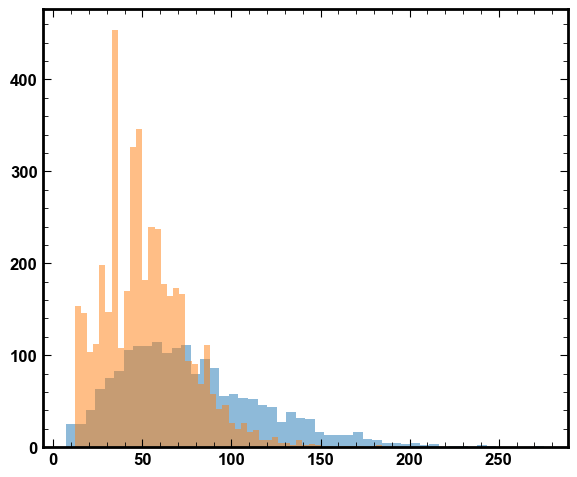

In [140]:
plt.hist(region['pore.diameter']*10**9, bins=50,alpha=0.5)
plt.hist(region['throat.diameter']*10**9, bins=50,alpha=0.5)

# plt.hist(pn_total[0][0][1]['pore.diameter']*10**9, bins=50,alpha=0.5)
# plt.hist(pn_total[0][0][2]['pore.diameter']*10**9, bins=50,alpha=0.5)
# plt.hist(pn_total[0][0][3]['pore.diameter']*10**9, bins=50,alpha=0.5)
# plt.hist(pn_total[0][0][4]['pore.diameter']*10**9, bins=50,alpha=0.5)
# plt.hist(pn_total[0][0][5]['pore.diameter']*10**9, bins=50,alpha=0.5)


(array([ 53.,  47.,  65., 109., 118., 142., 114., 124., 120.,  88.,  92.,
         73.,  57.,  49.,  54.,  36.,  31.,  27.,  19.,  17.,  17.,  14.,
          6.,  13.,   4.,   2.,   7.,   5.,   1.,   5.,   2.,   6.,   6.,
          4.,   2.,   2.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.,   0.,   2.,   0.,   1.,   1.]),
 array([ 10.7364,  17.7859,  24.8354,  31.8849,  38.9344,  45.9839,
         53.0334,  60.0829,  67.1324,  74.1819,  81.2314,  88.2809,
         95.3304, 102.3799, 109.4294, 116.4789, 123.5284, 130.5779,
        137.6274, 144.6769, 151.7264, 158.7759, 165.8254, 172.8749,
        179.9244, 186.9739, 194.0234, 201.0729, 208.1223, 215.1718,
        222.2213, 229.2708, 236.3203, 243.3698, 250.4193, 257.4688,
        264.5183, 271.5678, 278.6173, 285.6668, 292.7163, 299.7658,
        306.8153, 313.8648, 320.9143, 327.9638, 335.0133, 342.0628,
        349.1123, 356.1618, 363.2113]),
 <BarContainer object of 50 artists>)

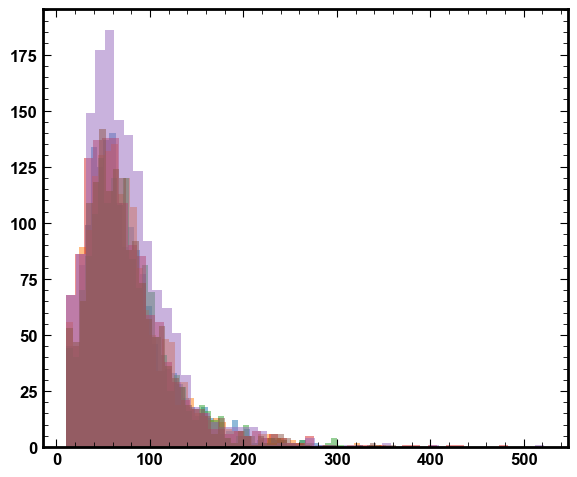

In [137]:
plt.hist(pn_total[1][0][0]['pore.diameter']*10**9, bins=50,alpha=0.5)
plt.hist(pn_total[1][0][1]['pore.diameter']*10**9, bins=50,alpha=0.5)
plt.hist(pn_total[1][0][2]['pore.diameter']*10**9, bins=50,alpha=0.5)
plt.hist(pn_total[1][0][3]['pore.diameter']*10**9, bins=50,alpha=0.5)
plt.hist(pn_total[1][0][4]['pore.diameter']*10**9, bins=50,alpha=0.5)
plt.hist(pn_total[1][0][5]['pore.diameter']*10**9, bins=50,alpha=0.5)


In [78]:
#calculate both phase volume fractions using the pore network 

total_volume_fractions = []
for b,bin in enumerate(total_volumes):
    bin_volume_fractions = []

    for s,sample in enumerate(bin):
        sample_volume_fractions = []
        for r,region in enumerate(sample):
            sample_volume_fractions.append(region/(region+total_volumes[(b+1)%2][s][r]))
        bin_volume_fractions.append(sample_volume_fractions)
    total_volume_fractions.append(bin_volume_fractions)

total_volume_fractions = np.array(total_volume_fractions)

print(total_volume_fractions)
print()
print(formfactors)

[[[0.4923 0.4927 0.4807 0.4739 0.4806 0.4934]
  [0.4506 0.4113 0.4129 0.4582 0.4605 0.4685]
  [0.5997 0.5684 0.581  0.5659 0.5814 0.5883]]

 [[0.5077 0.5073 0.5193 0.5261 0.5194 0.5066]
  [0.5494 0.5887 0.5871 0.5418 0.5395 0.5315]
  [0.4003 0.4316 0.419  0.4341 0.4186 0.4117]]]

[[[0.2101 0.2188 0.2023 0.1557 0.1937 0.2162]
  [0.1854 0.1329 0.1463 0.2095 0.2067 0.1903]
  [0.3385 0.2852 0.3017 0.2744 0.3795 0.2694]]

 [[0.222  0.217  0.2211 0.1906 0.2432 0.2023]
  [0.2429 0.2676 0.245  0.233  0.2573 0.2423]
  [0.1245 0.1336 0.1162 0.1549 0.1554 0.1163]]]


In [79]:
for b,bin in enumerate(total_volume_fractions):
    for s,sample in enumerate(bin):
        for r,region in enumerate(sample):
            complete_volume = region+total_volume_fractions[(b+1)%2][s][r]
            if complete_volume != 1:
                print('solid + void volume fractions do not add to 1: ', complete_volume)


solid + void volume fractions do not add to 1:  0.9999999999999998
solid + void volume fractions do not add to 1:  0.9999999999999999
solid + void volume fractions do not add to 1:  0.9999999999999998
solid + void volume fractions do not add to 1:  0.9999999999999999


In [80]:
for s,sample in enumerate(total_volumes[0]):
    for r,region in enumerate(sample):
        complete_volume = region + total_volumes[1][s][r]
        percent_error = (complete_volume-(1.2e-6)**3)/((1.2e-6)**3)
        print('{:.2f}%'.format(percent_error*100))
    print()

9.50%
9.19%
9.63%
9.45%
9.58%
9.32%

9.53%
9.71%
10.07%
9.29%
9.99%
8.92%

9.70%
9.68%
9.90%
9.97%
10.12%
9.42%



In [81]:
for s,sample in enumerate(total_volumes[0]):
    for r,region in enumerate(sample):
        solid_vol_actual = ps.metrics.porosity(im_total[0][s][r])*(1.2e-6**3)
        percent_error_solid = (region - solid_vol_actual)/solid_vol_actual
        print('Solid volume percent error {:.2f}%'.format(percent_error_solid*100))

        void_vol_actual = ps.metrics.porosity(im_total[1][s][r])*(1.2e-6**3)
        percent_error_void = (total_volumes[1][s][r] - void_vol_actual)/void_vol_actual
        print('Void volume percent error {:.2f}%'.format(percent_error_void*100))

        print()
    print()

Solid volume percent error 9.13%
Void volume percent error 9.86%

Solid volume percent error 9.13%
Void volume percent error 9.25%

Solid volume percent error 9.30%
Void volume percent error 9.93%

Solid volume percent error 9.41%
Void volume percent error 9.48%

Solid volume percent error 8.20%
Void volume percent error 10.88%

Solid volume percent error 9.06%
Void volume percent error 9.57%


Solid volume percent error 9.12%
Void volume percent error 9.86%

Solid volume percent error 10.01%
Void volume percent error 9.50%

Solid volume percent error 8.28%
Void volume percent error 11.36%

Solid volume percent error 8.59%
Void volume percent error 9.88%

Solid volume percent error 10.32%
Void volume percent error 9.71%

Solid volume percent error 9.80%
Void volume percent error 8.15%


Solid volume percent error 10.95%
Void volume percent error 7.88%

Solid volume percent error 10.50%
Void volume percent error 8.62%

Solid volume percent error 11.01%
Void volume percent error 8.41%

S

(0.0, 0.5)

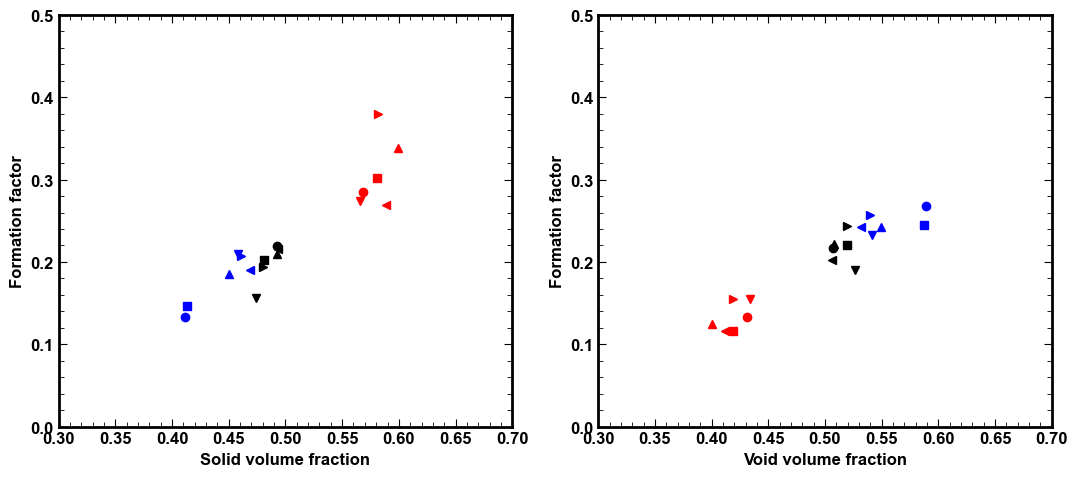

In [82]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(11,5))

colors =['k','b','r']
shapes = ['^','o','s','v','>','<']

for b,bin in enumerate(formfactors):
    for s,sample in enumerate(bin):
        for r,region in enumerate(sample):
            if b==0:
                ax1.plot(total_volume_fractions[b][s][r],region, color=colors[s],marker=shapes[r] )
            if b==1:
                ax2.plot(total_volume_fractions[b][s][r],region, color=colors[s],marker=shapes[r])


ax1.set_xlabel("Solid volume fraction")
ax1.set_ylabel("Formation factor")

ax2.set_xlabel("Void volume fraction")
ax2.set_ylabel("Formation factor")

ax1.set_xlim([0.3, 0.7])
ax2.set_xlim([0.3, 0.7])

ax1.set_ylim([0, 0.5])
ax2.set_ylim([0, 0.5])

# ax.invert_xaxis()
# plt.tick_params(axis='x', which='minor')


# Water retention curves 9/6/2025 trying with updated geometry

In [525]:
#Create OpenPNM project objects
pn_solid = []
pn_void = []

for x in snow_solid_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_solid.append(pn_temp)
    
for x in snow_void_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [526]:
for s,sample in enumerate(pn_total[1]):
    for r,region in enumerate(sample):

        h = op.utils.check_network_health(region)
        op.topotools.trim(network=region, pores=h['disconnected_pores'])
        region.regenerate_models()


        region['pore.diameter'] = region['pore.extended_diameter']
        region['throat.diameter'] = region['throat.inscribed_diameter']
        
        region.add_model(propname='throat.coords',model=op.models.geometry.throat_centroid.pore_coords)
       
        region.add_model(propname='throat.length',model=op.models.geometry.throat_length.hybrid_cones_and_cylinders)
        region.add_model(propname='throat.volume',model=op.models.geometry.throat_volume.cylinder)

        region.regenerate_models()


In [527]:
for i in region['throat.length']:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
1.1692731530296161e-08
0.0
0.0
3.459021407988959e-08
0.0
0.0
3.5526407968282515e-08
0.0
2.0487104056094277e-08
4.662398349998335e-08
2.98140614168595e-08
3.7690724508865745e-08
2.3585537662102717e-08
4.2959327048683645e-08
3.0153945741471975e-08
1.3076144266230933e-07
8.047264825625606e-08
0.0
9.655202726280248e-08
6.266575622301041e-08
0.0
1.5281294383448054e-08
0.0
3.3078304024902866e-08
0.0
0.0
1.537823253982126e-08
0.0
0.0
3.329967354152659e-08
0.0
0.0
1.2635100506275642e-08
0.0
4.5150427253298656e-08
0.0
0.0
1.5772732265663254e-08
3.560047106795411e-08
0.0
0.0
2.8805034953559096e-08
8.049616672935674e-09
0.0
0.0
9.598818222148278e-08
6.357840621693569e-08
6.081976875696541e-08
2.718747245978654e-08
4.24789664073247e-08
5.8676625300674785e-08
4.6552285222679423e-08
3.4595148150907874e-08
2.517773598333195e-08
1.4242459386773773e-08
0.0
0.0
0.0
3.906295471919126e-08
8.483704047503399e-08
1.0242588539463892e-07
5.6372280221927006e-08
1.1441205967647639e-07
4.5

In [528]:
phases = []       
for s,sample in enumerate(pn_total[1]):
        sample_phases = []
        for r,region in enumerate(sample):
                phase = op.phase.Phase(network=region, name='phase_{}_{}'.format(s,r))
                phase['pore.contact_angle'] =  105
                phase['pore.surface_tension'] = 0.0626
                # phase['throat.contact_angle'] =  105
                # phase['throat.surface_tension'] = 0.0626

                # phase.add_model_collection(op.models.collections.phase.water)
                # phase.add_model_collection(op.models.collections.physics.basic)


                phase.add_model('throat.entry_pressure',model=op.models.physics.capillary_pressure.washburn)
                phase.regenerate_models()

                sample_phases.append(phase)
        phases.append(sample_phases)



In [529]:
print(phases[0][0]['throat.contact_angle'])
print(phases[0][0]['throat.surface_tension'])

[105. 105. 105. ... 105. 105. 105.]
[0.0626 0.0626 0.0626 ... 0.0626 0.0626 0.0626]


In [530]:
percs = []
drains = []
for s,sample in enumerate(pn_total[1]):
    sample_percs = []
    sample_drains = []
    for r,region in enumerate(sample):

        inlets = region.pores('ymax')
        used_inlets = [inlets[y] for y in range(0, len(inlets), 1)]
        op.algorithms.InvasionPercolation(network=region,phase=phases[s][r]).reset()
        perc = op.algorithms.InvasionPercolation(network=region,phase=phases[s][r],name='perc_{}_{}'.format(s,r))
        perc.set_inlet_BC(pores = used_inlets)
        perc.run()


        inlets = region.pores('ymax')
        used_inlets = [inlets[y] for y in range(0, len(inlets), 1)]
        op.algorithms.Drainage(network=region,phase=phases[s][r]).reset()
        drain = op.algorithms.Drainage(network=region,phase=phases[s][r],name='drain_{}_{}'.format(s,r))
        drain.set_inlet_BC(pores = used_inlets)
        drain.run()

        sample_percs.append(perc)
        sample_drains.append(drain)
    percs.append(sample_percs)
    drains.append(sample_drains)

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

In [531]:
print(drains[0][0])


══════════════════════════════════════════════════════════════════════════════
drain_0_0 : <openpnm.algorithms.Drainage at 0x18e04a840>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.invasion_pressure                                        1669 / 1669
  3  throat.invasion_pressure                                      3281 / 3281
  4  pore.invasion_sequence                                        1669 / 1669
  5  throat.invasion_sequence                                      3281 / 3281
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                            

In [532]:
perc_pcs = []
perc_sats = []
for s,sample in enumerate(percs):
    sample_pcs = []
    sample_sats = []
    for r,region in enumerate(sample):
        region_pc = []
        region_sat_tot = []

        pc = region.pc_curve().pc
        sat = region.pc_curve().snwp

        region_sat_tot.append(sat[0]) 
        region_pc.append(pc[0])
        for i,x in enumerate(sat):
            if  sat[i] - region_sat_tot[-1] > 0.0:
                region_pc.append(pc[i])
                region_sat_tot.append(sat[i])
        sample_pcs.append(region_pc)
        sample_sats.append(region_sat_tot)
    perc_pcs.append(sample_pcs)
    perc_sats.append(sample_sats)

In [533]:
drain_pcs = []
drain_sats = []
for s,sample in enumerate(drains):
    sample_pcs = []
    sample_sats = []
    for r,region in enumerate(sample):
        region_pc = []
        region_sat_tot = []

        pc = region.pc_curve().pc
        sat = region.pc_curve().snwp

        region_sat_tot.append(sat[0]) 
        region_pc.append(pc[0])
        for i,x in enumerate(sat):
            if  sat[i] - region_sat_tot[-1] > 0.0:
                region_pc.append(pc[i])
                region_sat_tot.append(sat[i])
        sample_pcs.append(region_pc)
        sample_sats.append(region_sat_tot)
    drain_pcs.append(sample_pcs)
    drain_sats.append(sample_sats)

In [534]:
print(drain_pcs[0][0])
print(len(drain_pcs[0][0]))

[348943.80156821513, 407822.7787525255, 476636.69084237196, 557061.9075081765, 651057.6603916414, 760913.7717757437, 889306.4367443266, 1039363.4177355577, 1214740.239688064, 1419709.2419629912, 1659263.6564280728, 1939239.2471407414, 2266456.4748839247, 2648886.6498123524, 3095846.1198393293, 3618223.2253702367, 4228743.549207166, 5776214.744772045]
18


In [535]:
#log normal std (same for diam or radius)
ln_sigma = np.array([0.6352,0.7396,0.6127])

#log normal mean (diam [nm])
ln_mu_diam = np.array([4.6565,4.9255,4.5715])
dm = np.exp(ln_mu_diam + (ln_sigma**2/2))*10**-9
print('Dm: ', dm)
print('Dm/2: ', dm/2)


ln_mu_rad = np.log(np.exp(ln_mu_diam)/2)
print('ln_mu_rad: ',ln_mu_rad)

rm = np.exp(ln_mu_rad + (ln_sigma**2/2))*10**-9
print('Rm: ',rm)


Dm:  [1.2880e-07 1.8109e-07 1.1665e-07]
Dm/2:  [6.4399e-08 9.0546e-08 5.8326e-08]
ln_mu_rad:  [3.9634 4.2324 3.8784]
Rm:  [6.4399e-08 9.0546e-08 5.8326e-08]


In [536]:
# print(perc_pcs)

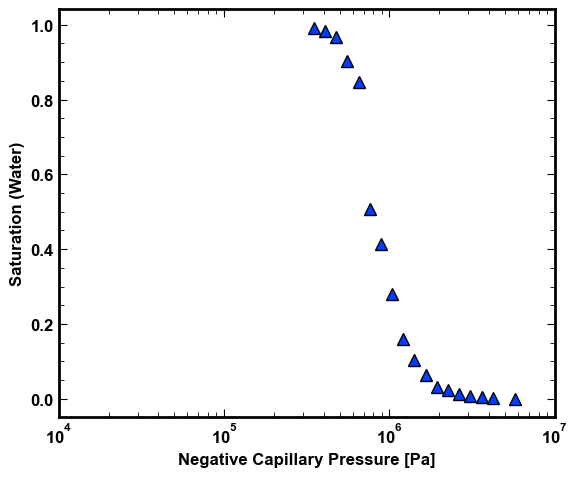

In [537]:
fig, ax = plt.subplots()

colors =sns.color_palette('bright',6)
shapes = ['^','o','s','v','>','<']
zorders = [100,99,98]



for s,sample in enumerate(drain_pcs):
    for r,region in enumerate(sample):
        if s==0 and r==0:
        # if True:
            # ax.plot(np.array(perc_pcs[s][r])*-1,1-np.array(perc_sats[s][r]),'-',color = colors[s],  
            #         markeredgewidth=0.5,zorder=zorders[s])
            ax.plot(drain_pcs[s][r],1-np.array(drain_sats[s][r]),linewidth=0,color = colors[s], marker = shapes[r], 
                    markeredgewidth=1,markersize=8,markeredgecolor='k', zorder=zorders[s])
            

pcap = np.logspace(4,7,100)*-1
gamma = 0.0626
theta = 75

for i,sample in enumerate(rm):
    rk = rm[i]
    sk = ln_sigma[i]/2
    rcap = -2*gamma*np.cos(np.deg2rad(theta))/pcap
    x = np.log(rcap/rk)/(sk*np.sqrt(2))
    s = 0.5*(1+sp.special.erf(x))
    # ax.plot(pcap*-1,s,color=line_colors[i], linewidth=4,zorder=200)

ax.set_xlabel("Negative Capillary Pressure [Pa]")
ax.set_ylabel("Saturation (Water)")
ax.set_xscale('log')
ax.set_xlim([10**7, 10**4])
ax.invert_xaxis()
plt.tick_params(axis='x', which='minor')



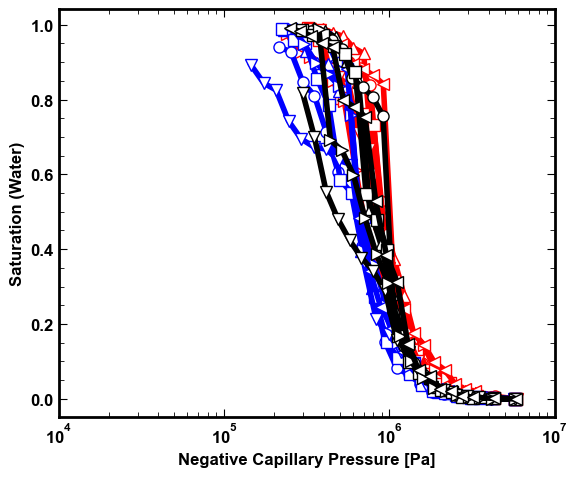

In [538]:
fig, ax = plt.subplots()

line_colors =['k','b','r']
shapes = ['^','o','s','v','>','<']
zorders = [100,99,98]

for s,sample in enumerate(drain_pcs):
    for r,region in enumerate(sample):
        # if s==0 and r==0:
        if True:
            # ax.plot(perc_pcs[s][r],1-np.array(perc_sats[s][r]),color = line_colors[s], marker = shapes[r], 
            #         markeredgewidth=0.5, markerfacecolor='white',zorder=zorders[s])
            ax.plot(drain_pcs[s][r],1-np.array(drain_sats[s][r]),linewidth=4,color = line_colors[s], marker = shapes[r], 
                    markeredgewidth=1,markersize=8, markerfacecolor='white',zorder=zorders[s])
            

pcap = np.logspace(4,7,100)*-1
gamma = 0.0626
theta = 75

for i,sample in enumerate(rm):
    rk = rm[i]
    sk = ln_sigma[i]/2
    rcap = -2*gamma*np.cos(np.deg2rad(theta))/pcap
    x = np.log(rcap/rk)/(sk*np.sqrt(2))
    s = 0.5*(1+sp.special.erf(x))
    # ax.plot(pcap*-1,s,color=line_colors[i], linewidth=4,zorder=200)

ax.set_xlabel("Negative Capillary Pressure [Pa]")
ax.set_ylabel("Saturation (Water)")
ax.set_xscale('log')
ax.set_xlim([10**7, 10**4])
ax.invert_xaxis()
plt.tick_params(axis='x', which='minor')



In [ ]:
#interpolation to average water retention curves for each sample across regions

x_interp = []
y_interp = []

x_all = []
f_avg = []

drain_pcs_cut = drain_pcs.copy()
drain_sats_cut = drain_sats.copy()

for s,sample in enumerate(drain_pcs_cut):
    sample_x_data = []
    sample_y_data = []
    sample_x_min_vals = []
    sample_x_max_vals = []
    sample_interp_funcs = []
    for r,region in enumerate(sample):
        sample_x_data.append(region)
        sample_y_data.append(drain_sats_cut[s][r])
        sample_x_max_vals.append(max(region))
        sample_x_min_vals.append(min(region))
        sample_interp_funcs.append(interp1d(region, drain_sats_cut[s][r]))
        
    x_max = math.floor(min(sample_x_max_vals))
    x_min = math.ceil(max(sample_x_min_vals))
    
    # define common carrier for calculation of average curve
    sample_x_all   = np.geomspace(x_min, x_max, num=50)
    
    sample_f_int = []
    for r,region in enumerate(sample):
        # evaluation of fits on common carrier
        sample_f_int.append(sample_interp_funcs[r](sample_x_all))
        
    # put all fits to one matrix for fast mean calculation
    data_collection = np.vstack(sample_f_int)

    # calculating mean value
    sample_f_avg = np.average(data_collection, axis=0)

    x_interp.append(sample_x_data)
    y_interp.append(sample_y_data)
    x_all.append(sample_x_all)
    f_avg.append(sample_f_avg)


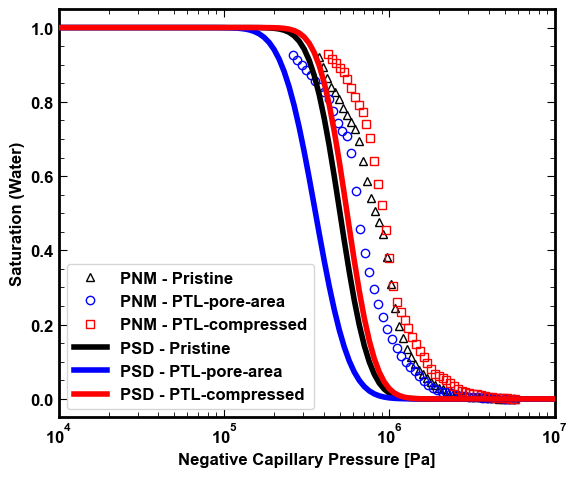

In [540]:
fig, ax = plt.subplots()

colors =['k','b','r']
shapes = ['^','o', 's']
labels = ['Pristine','PTL-pore-area','PTL-compressed']

for s,sample in enumerate(f_avg):
    ax.plot(x_all[s],1-np.array(f_avg[s]),' ',color=colors[s], marker=shapes[s], markerfacecolor='none',
            label='PNM - {}'.format(labels[s]))

pcap = np.logspace(4,7,100)*-1
gamma = 0.0626
theta = 75

for i,sample in enumerate(rm):
    rk = rm[i]
    sk = ln_sigma[i]/2
    x = np.log(rcap/rk)/(sk*np.sqrt(2))
    s = 0.5*(1+sp.special.erf(x))
    ax.plot(pcap*-1,s,color=colors[i], linewidth=4,zorder=200,
            label='PSD - {}'.format(labels[i]))


ax.set_xlabel("Negative Capillary Pressure [Pa]")
ax.set_ylabel("Saturation (Water)")
ax.set_xscale('log')
ax.set_xlim([10**7, 10**4])
ax.invert_xaxis()
ax.legend()
plt.tick_params(axis='x', which='minor')



# Relative Permeability and Diffusivity - 9/6/25 new geometry

## Define helper functions

In [625]:
def sat_update(network, nwp, wp):
    """
        Calculates the saturation of NON-WETTING phase using occupancy information from ordinary percolation.
        Parameters
        ----------
        network: network
        nwp : phase
            non-wetting phase
        wp : phase
            wetting phase
    """
    pore_mask = nwp["pore.occupancy"] == 1
    throat_mask = nwp["throat.occupancy"] == 1
    sat_p = np.sum(network['pore.volume'][pore_mask])
    sat_t = np.sum(network['throat.volume'][throat_mask])
    sat1 = sat_p + sat_t
    bulk = network['pore.volume'].sum() + network['throat.volume'].sum()
    sat = sat1/bulk
    return sat

In [626]:
def Rate_calc_diff(network, phase, inlet, outlet, conductance):
    phase.regenerate_models()
    Fd = op.algorithms.FickianDiffusion(network=network, phase=phase)
    Fd.settings._update({'conductance' : conductance})
    Fd.set_value_BC(pores=inlet, values=1)
    Fd.set_value_BC(pores=outlet, values=0)
    Fd.run()
    R = np.sum(np.abs(Fd.rate(pores=inlet, mode='group')))
    L = 1.2e-6
    A = 1.44e-12
    D_eff = R * (L) / (A) / (1)
    return D_eff

In [627]:
def Rate_calc_perm(network, phase, inlet, outlet, conductance):
    phase.regenerate_models()
    St_p = op.algorithms.StokesFlow(network=network, phase=phase)
    St_p.settings._update({'conductance' : conductance})
    St_p.set_value_BC(pores=inlet, values=1)
    St_p.set_value_BC(pores=outlet, values=0)
    St_p.run()
    R = np.sum(np.abs(St_p.rate(pores=inlet, mode='group')))
    L = 1.2e-6
    A = 1.44e-12
    K_eff = R * phase['pore.viscosity'][0] * L / A / 1
    return K_eff

## Reinitialize pore networks 

In [642]:
#Create OpenPNM project objects
pn_solid = []
pn_void = []

for x in snow_solid_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_solid.append(pn_temp)
    
for x in snow_void_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [643]:
# Geometry

# total_volumes = []
for s,sample in enumerate(pn_total[1]):
    # sample_total_volumes = []
    for r,region in enumerate(sample):

        h = op.utils.check_network_health(region)
        # print(h)
        op.topotools.trim(network=region, pores=h['disconnected_pores'])
        h = op.utils.check_network_health(region)
        # print(h);

        # region.add_model_collection(spheres_and_cylinders_KF)
        # region.add_model_collection(cones_and_cylinders_KF)
        # region.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)

        region['pore.diameter'] = region['pore.equivalent_diameter']
        region['throat.diameter'] = region['throat.inscribed_diameter']*0.7
        region['throat.spacing'] = region['throat.total_length']    
        region.add_model(propname='throat.diffusive_size_factors',model=op.models.geometry.diffusive_size_factors.pyramids_and_cuboids)
        region.add_model(propname='throat.hydraulic_size_factors',model=op.models.geometry.hydraulic_size_factors.pyramids_and_cuboids)

        region.add_model(propname='throat.length',model=op.models.geometry.throat_length.pyramids_and_cuboids)
        region.add_model(propname='throat.volume',model=op.models.geometry.throat_volume.cylinder)

        # total_volume = np.sum(region['pore.volume']) + np.sum(region['throat.volume'])
        # sample_total_volumes.append(total_volume)
    # total_volumes.append(sample_total_volumes)


In [644]:
#calculate both phase volume fractions using the pore network 

# total_volume_fractions = []
# for s,sample in enumerate(total_volumes):
#     sample_volume_fractions = []
#     for r,region in enumerate(sample):
#         sample_volume_fractions.append(region/(region+total_volumes[(b+1)%2][s][r]))
#     total_volume_fractions.append(sample_volume_fractions)

# total_volume_fractions = np.array(total_volume_fractions)

# print(total_volume_fractions)
# print()


In [645]:
phases_nw = []
phases_w = []

for s,sample in enumerate(pn_total[1]):
    sample_phases_nw = []
    sample_phases_w = []

    for r,region in enumerate(sample):

        phase_nw = op.phase.Phase(network=region,name='phase_nw_{}_{}'.format(s,r))
        phase_nw['pore.surface_tension'] = 0.072
        phase_nw['pore.contact_angle'] =  100  
        phase_nw.add_model('throat.entry_pressure',model=op.models.physics.capillary_pressure.washburn)
        phase_nw['pore.diffusivity'] = 2.4e-9
        phase_nw['pore.viscosity'] = 20.55e-6
        phase_nw['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive(phase_nw)
        phase_nw['throat.hydraulic_conductance'] = op.models.physics.hydraulic_conductance.generic_hydraulic(phase_nw)
        phase_nw.regenerate_models()


        phase_w = op.phase.Phase(network=region,name='phase_w_{}_{}'.format(s,r))
        phase_w.add_model_collection(op.models.collections.phase.water)
        phase_w['pore.surface_tension'] = 0.072
        phase_w['throat.surface_tension'] = 0.072
        phase_w['pore.contact_angle'] =  80 
        phase_w['throat.contact_angle'] =  80 
        phase_w['pore.diffusivity'] =  1e-9 
        phase_w.regenerate_models()
        phase_w.add_model('throat.entry_pressure',model=op.models.physics.capillary_pressure.washburn)
        phase_w['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive(phase_w)
        phase_w['throat.hydraulic_conductance'] = op.models.physics.hydraulic_conductance.generic_hydraulic(phase_w)
        phase_w.regenerate_models()

        sample_phases_nw.append(phase_nw)
        sample_phases_w.append(phase_w)

    phases_nw.append(sample_phases_nw)
    phases_w.append(sample_phases_w)


[12:28:12] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=969104;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=480231;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=890618;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=60446;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=661280;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=883168;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=544209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=93281;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:13] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=730848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=902070;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=358399;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=721209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=504604;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=686260;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=375620;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=243992;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=529836;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=510245;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=953483;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=18148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=808331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=987044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=924817;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=347605;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:14] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=671056;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=404022;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=430311;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=747807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=244132;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=152954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=90731;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=610043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=799589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=579586;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:28:15] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=150183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=700767;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=486593;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=403568;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=11438;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=885756;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=791867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=997030;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=455053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=23823;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=437177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=848243;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=771475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=707715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:16] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=896021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=667195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=272402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=287711;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=944647;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=734638;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=359811;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=59483;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=381287;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=840088;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:28:17] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=200600;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=372958;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=75611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=703408;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=479981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=763488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=326502;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=257453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=627903;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=940055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=773032;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=884766;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=75760;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=866208;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:18] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=677460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=694395;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=856245;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=959725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=911916;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=995278;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=945792;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=166496;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=409305;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=180577;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=587888;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=515404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=863167;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=486639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=628024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=151069;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:19] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=195653;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878570;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=16382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=799286;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=949073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=131729;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=178629;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=70168;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:20] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=986872;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=307173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=655405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=575562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=386085;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=958696;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=520141;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=134024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=204871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=242331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=329773;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=559697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=455485;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=385587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=859654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=485599;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:21] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=711316;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=170057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=958636;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=323315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=938922;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=325535;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=545845;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=613054;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=466128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=784150;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:28:22] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=650204;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=51184;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=950714;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=649717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=680532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=449193;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=691142;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=791419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=302531;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=760380;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=477514;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=682741;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=62933;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=78541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:23] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=605319;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=216181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=865580;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=634424;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=112568;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=577385;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=451753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=982617;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

In [646]:
diffs_sp_nwp = []
diffs_sp_wp = []
perms_sp_nwp = []
perms_sp_wp = []

for s,sample in enumerate(pn_total[1]):
    sample_diffs_sp_nwp = []
    sample_diffs_sp_wp = []
    sample_perms_sp_nwp = []
    sample_perms_sp_wp = []

    for r,region in enumerate(sample):

        inlet = region.pores('ymin')
        outlet = region.pores('ymax')
        
        diff_sp_nwp = Rate_calc_diff(region, phases_nw[s][r], inlet, outlet, conductance = 'throat.diffusive_conductance')
        diff_sp_wp = Rate_calc_diff(region, phases_w[s][r], inlet, outlet, conductance = 'throat.diffusive_conductance')

        perm_sp_nwp = Rate_calc_perm(region,phases_nw[s][r], inlet, outlet, conductance = 'throat.hydraulic_conductance')
        perm_sp_wp = Rate_calc_perm(region,phases_w[s][r], inlet, outlet, conductance = 'throat.hydraulic_conductance')

        sample_diffs_sp_nwp.append(diff_sp_nwp)
        sample_diffs_sp_wp.append(diff_sp_wp)
        sample_perms_sp_nwp.append(perm_sp_nwp)
        sample_perms_sp_wp.append(perm_sp_wp)
    diffs_sp_nwp.append(sample_diffs_sp_nwp)
    diffs_sp_wp.append(sample_diffs_sp_wp)
    perms_sp_nwp.append(sample_perms_sp_nwp)
    perms_sp_wp.append(sample_perms_sp_wp)
        

[12:28:24] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=315968;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=745318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=602176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=276347;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=925788;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=825353;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:28:25] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=612220;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=802034;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=59514;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=112249;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=662054;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=140707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=547752;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=489048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=741660;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=955498;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=40801;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=767644;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=984665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=427449;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:26] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=902028;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=684927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=295309;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=212404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=681118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=202223;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=322741;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=52965;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=758889;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=459947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=471851;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=890084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=230241;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=847077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=685393;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=933655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:27] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=571563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=117714;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=538532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=392766;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=574583;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=785047;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=272401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=560128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=736089;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=808745;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=574986;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=93890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=278749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=717802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:28:28] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=562658;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=525998;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=971013;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=815695;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=188613;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=629493;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=280308;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=93963;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=236564;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=247235;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=845117;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=607850;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=153112;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=594333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:29] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=855919;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=80016;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=180354;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=897325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=95784;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=937422;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=564979;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=700782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=361864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=871848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=991648;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=238533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:30] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=226534;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=616233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=430911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=544558;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=409536;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=984020;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=635923;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=128226;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=303184;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=113480;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=364565;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=1058;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=682697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=633868;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=537127;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=795853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:31] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=608441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=677467;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=710859;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=102504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=374013;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=930658;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=211995;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=532137;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=729911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=531917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=372942;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=27901;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:32] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=337183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=393545;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=753388;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=30504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=708156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=363958;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=567103;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=263598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=442200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=847742;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=244212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=280029;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=795370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=625703;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=787952;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=584022;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:33] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=242025;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=973601;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=509741;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=961155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=229062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=157589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=209257;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=593853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=986682;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=615994;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=862222;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=514860;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:28:34] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=810571;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=745426;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=908814;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=225893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=991862;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=561218;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=390033;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=126499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=959565;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=909633;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=532254;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=815766;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

In [658]:
print(np.array(perms_sp_nwp))
print(np.array(perms_sp_wp))
print(np.array(diffs_sp_nwp))
print(np.array(diffs_sp_wp))

print(total_volume_fractions[1])


[[2.7294e-17 2.0023e-17 2.5660e-17 1.1283e-16 5.3557e-17 2.2200e-17]
 [4.1609e-17 7.2545e-17 8.7719e-17 4.1242e-17 3.0477e-17 4.2010e-17]
 [1.4596e-17 1.1065e-17 1.0167e-17 1.5119e-17 2.6645e-17 1.5070e-17]]
[[2.7294e-17 2.0023e-17 2.5660e-17 1.1283e-16 5.3557e-17 2.2200e-17]
 [4.1609e-17 7.2545e-17 8.7719e-17 4.1242e-17 3.0477e-17 4.2010e-17]
 [1.4596e-17 1.1065e-17 1.0167e-17 1.5119e-17 2.6645e-17 1.5070e-17]]
[[4.1452e-10 4.2043e-10 4.3968e-10 4.8295e-10 4.5847e-10 3.8584e-10]
 [4.6229e-10 5.6103e-10 5.9831e-10 3.8488e-10 3.0206e-10 4.4092e-10]
 [2.5152e-10 2.4898e-10 2.2965e-10 3.3217e-10 2.4272e-10 2.8387e-10]]
[[1.7272e-10 1.7518e-10 1.8320e-10 2.0123e-10 1.9103e-10 1.6077e-10]
 [1.9262e-10 2.3376e-10 2.4929e-10 1.6037e-10 1.2586e-10 1.8372e-10]
 [1.0480e-10 1.0374e-10 9.5686e-11 1.3841e-10 1.0113e-10 1.1828e-10]]
[[0.5087 0.5082 0.5199 0.5285 0.5198 0.5072]
 [0.5509 0.5921 0.5891 0.5443 0.5407 0.5344]
 [0.4006 0.4329 0.421  0.4356 0.4198 0.4138]]


Text(0.5, 0, 'Porosity')

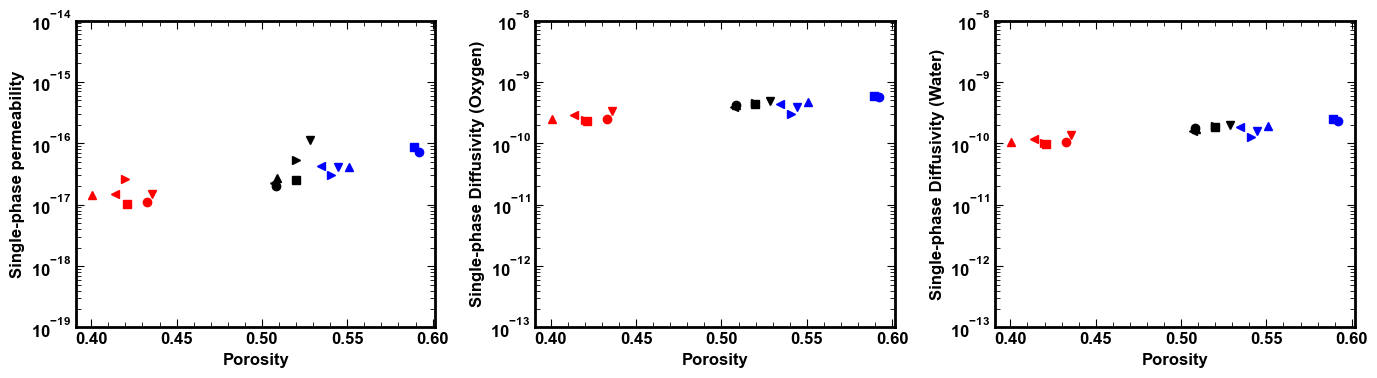

In [661]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))
line_colors =['k','b','r']
markers = ['^','o','s','v','>','<']


for s,sample in enumerate(total_volume_fractions[1]):
    for r,region in enumerate(sample):
        ax1.plot(region,perms_sp_nwp[s][r],color=colors[s],marker=markers[r])
        ax2.plot(region,diffs_sp_nwp[s][r],color=colors[s],marker=markers[r])
        ax3.plot(region,diffs_sp_wp[s][r],color=colors[s],marker=markers[r])

# ax.legend()
ax1.set_yscale('log')
ax1.set_ylim(10**-19,10**-14)
ax1.set_ylabel('Single-phase permeability')
ax1.set_xlabel('Porosity')

ax2.set_yscale('log')
ax2.set_ylim(10**-13,10**-8)
ax2.set_ylabel('Single-phase Diffusivity (Oxygen)')
ax2.set_xlabel('Porosity')

ax3.set_yscale('log')
ax3.set_ylim(10**-13,10**-8)
ax3.set_ylabel('Single-phase Diffusivity (Water)')
ax3.set_xlabel('Porosity')




In [649]:
drains = []

for s,sample in enumerate(pn_total[1]):
    sample_drains = []

    for r,region in enumerate(sample):
        inlet = region.pores('ymin')
        outlet = region.pores('ymax')

        op.algorithms.Drainage(network=region,phase=phases_nw[s][r]).reset()
        drain = op.algorithms.Drainage(network=region, phase=phases_nw[s][r])
     
        drain.set_inlet_BC(inlet)
        drain.run()

        sample_drains.append(drain)
    drains.append(sample_drains)

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

In [650]:

Snwparrs = []

reldiffs_nwp = []
reldiffs_wp = []

relperms_nwp = []
relperms_wp = []


for s,sample in enumerate(pn_total[1]):

    sample_Snwparr = []

    sample_reldiff_nwp = []
    sample_reldiff_wp = []

    sample_relperm_nwp = []
    sample_relperm_wp = []

    for r,region in enumerate(sample):
        drn = drains[s][r]
        phase_nw = phases_nw[s][r]
        phase_w = phases_w[s][r]
        diff_sp_nwp = diffs_sp_nwp[s][r]
        diff_sp_wp = diffs_sp_wp[s][r]
        perm_sp_nwp = perms_sp_nwp[s][r]
        perm_sp_wp = perms_sp_wp[s][r]


        Snwparr = []

        reldiff_nwp = []
        reldiff_wp = []

        relperm_nwp = []
        relperm_wp = []

        inlet = region.pores('ymin')
        outlet = region.pores('ymax')

        for Pc in np.unique(drn['pore.invasion_pressure']):
            phase_nw['pore.occupancy'] = drn['pore.invasion_pressure'] < Pc
            phase_nw['throat.occupancy'] = drn['throat.invasion_pressure'] < Pc
            phase_w['pore.occupancy'] = 1 - phase_nw['pore.occupancy']
            phase_w['throat.occupancy'] = 1 - phase_nw['throat.occupancy']
            phase_nw.regenerate_models()
            phase_w.regenerate_models()
            sat_point = sat_update(region,phase_nw,phase_w)
            Snwparr.append(sat_point)

            model_mp_cond = op.models.physics.multiphase.conduit_conductance
            phase_nw.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
                        throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')
            phase_w.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
                        throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')
            phase_nw.add_model(model=model_mp_cond, propname='throat.conduit_hydraulic_conductance',
                        throat_conductance='throat.hydraulic_conductance', mode='medium', regen_mode='deferred')
            phase_w.add_model(model=model_mp_cond, propname='throat.conduit_hydraulic_conductance',
                        throat_conductance='throat.hydraulic_conductance', mode='medium', regen_mode='deferred')
            phase_nw.regenerate_models()
            phase_w.regenerate_models()

            Rate_mult_nwp = Rate_calc_diff(region, phase_nw, inlet, outlet, conductance = 'throat.conduit_diffusive_conductance')
            Rate_mult_wp = Rate_calc_diff(region, phase_w, inlet, outlet, conductance = 'throat.conduit_diffusive_conductance')
            reldiff_nwp.append(Rate_mult_nwp/diff_sp_nwp)
            reldiff_wp.append(Rate_mult_wp/diff_sp_wp)


            Rate_p_mult_nwp = Rate_calc_perm(region, phase_nw, inlet, outlet, conductance = 'throat.conduit_hydraulic_conductance')
            Rate_p_mult_wp = Rate_calc_perm(region, phase_w, inlet, outlet, conductance = 'throat.conduit_hydraulic_conductance')
            relperm_nwp.append(Rate_p_mult_nwp/perm_sp_nwp)
            relperm_wp.append(Rate_p_mult_wp/perm_sp_wp)

        sample_Snwparr.append(Snwparr)

        sample_reldiff_nwp.append(reldiff_nwp)
        sample_reldiff_wp.append(reldiff_wp)

        sample_relperm_nwp.append(relperm_nwp)
        sample_relperm_wp.append(relperm_wp)


    Snwparrs.append(sample_Snwparr)

    reldiffs_nwp.append(sample_reldiff_nwp)
    reldiffs_wp.append(sample_reldiff_wp)

    relperms_nwp.append(sample_relperm_nwp)
    relperms_wp.append(sample_relperm_wp)


[12:29:00] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=14742;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=707846;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:29:01] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=407527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=791598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=213973;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=709904;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=118670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=576819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=693043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=106156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=321251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=856221;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=259570;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=69223;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=765163;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=976539;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=20925;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=892802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=414462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=363991;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:02] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=782107;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=799732;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=536221;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=359529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=610332;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=23601;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=982202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=934684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=348953;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=300129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=489495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=568090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=624308;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=394842;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=731996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=807457;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=342524;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=270382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=308609;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=775944;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:03] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=507045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=402461;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=758271;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=695116;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=668750;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=291134;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=253954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=578253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=929026;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=948728;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=50734;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=779568;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=581028;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=382140;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=490770;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=9844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=13646;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=104345;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:29:04] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=986368;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=434676;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=279609;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=706641;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=539498;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=489489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=414487;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=16619;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=712685;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=484683;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=461036;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=121042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=81632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=337375;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:05] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=319269;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=649832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=950853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=120339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=907730;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=543697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=608877;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=890529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=364566;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=464647;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=645304;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=413495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=566446;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=916494;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=496596;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=904296;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=929498;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=471572;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=740069;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=119120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:06] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=558245;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=656950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=974850;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=278824;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=653495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=405844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=948510;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=576641;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=441055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=375649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=573413;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=240628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=182172;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878708;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=887248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=843405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:07] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=479529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=410607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=212363;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=933015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=157628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=548065;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=468920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=11469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=516199;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=154811;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=342602;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=583062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=620973;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=439288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=418229;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=441904;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=594779;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=531957;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=778691;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=666956;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:08] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=472467;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=862741;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=112828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=157451;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=942193;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=865803;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=224438;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=732564;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=949907;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=209675;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=734891;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=416501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=293443;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=441407;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=740224;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=735431;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:09] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=525797;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=287253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=706196;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=55201;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=158093;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=612962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=952574;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=788867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=530289;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=307183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=374073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=101495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=878106;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=718490;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=417122;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=262232;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=152262;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=480545;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=4914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=286420;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:10] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=391534;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=436840;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=278634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=899636;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=986785;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=172084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=534796;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=762811;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=305230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=363958;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=638188;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=219271;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=646313;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=513150;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=202655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=223319;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=482322;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=973211;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=730258;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=307894;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:11] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=766947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=720567;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=317517;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=719290;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=24555;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=937149;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=241708;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=385673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=767173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=461772;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=333518;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=866712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=710166;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=416893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=835119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=568463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:12] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=911712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=237893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=65738;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=167832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=308818;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=554726;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=737494;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=469578;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=561787;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=865402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=437158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=531466;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=406180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=207465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=847050;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=314431;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=778929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=822068;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=986085;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=223536;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:13] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=98151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=741981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=790140;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=543768;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=88865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=804542;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=329595;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=789428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=976037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=509193;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=611351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609496;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=5983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=821119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=485074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=484202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:14] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=900986;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=906773;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=556691;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=644867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=48690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=468936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=209995;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=645450;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=326778;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=31448;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=657989;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=125256;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=870683;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=752002;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=36685;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=316735;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:15] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=954340;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=410917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=134015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=244981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=723737;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=67400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=266596;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=224129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=670139;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=995850;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=57113;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=5431;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=960433;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=504163;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=187983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=909555;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=491148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=326612;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=343145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=976177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:16] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=790554;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=859097;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=595682;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=492394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=922171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=285934;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=564767;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=983059;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=174095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=746265;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=234180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=746315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=74259;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=347949;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=974818;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=545003;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:17] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=536545;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=395587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=721135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=104816;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=451194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=380646;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=360769;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=304195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=629570;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=989143;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=715888;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=718481;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=261347;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=199598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=536458;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=715497;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:18] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=853635;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=831546;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=579825;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=971515;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=873012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=105702;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=239911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=408251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=816005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=755280;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=449309;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=545133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=523712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=192797;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=72636;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=739280;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:19] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=18532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=541007;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=222828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=230165;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=627169;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=596095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=997950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=795954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=777560;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=264909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=898817;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=220010;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=662175;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=810151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=508081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=529416;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:20] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=253470;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=503179;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=271197;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=471556;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=643799;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=984086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=562283;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=900461;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=219145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=210749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=926871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=24579;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=909803;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=842411;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=999929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=734688;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=192788;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=628783;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=51678;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=60345;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=618959;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=462349;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:29:21] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=306112;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=237243;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=670025;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=507887;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=14989;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=462491;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=669953;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=795306;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=995106;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=932360;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=164523;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=762243;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=194639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=545179;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=456374;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=685437;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=794558;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=856987;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:22] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=284455;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=622348;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=686276;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=833957;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=937132;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=763662;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=903409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=33970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=688710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=167356;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=66281;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=359975;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=655677;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=349963;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=431343;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=293345;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:23] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=163182;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=104547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=897572;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=115045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=532199;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=680039;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=435029;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=763333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=904550;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=236776;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=613282;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=362763;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=108167;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=273165;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=323299;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=929145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=675084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=353076;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=188698;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=867450;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:24] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=23015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=54224;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=214722;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=399984;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=983441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=516691;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=156279;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=895091;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=837935;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=325549;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=930542;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=338397;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=656677;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=310177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=986302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=414286;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:25] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=785717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=94998;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=901019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=115792;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=462382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=310355;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=468080;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=596502;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=637454;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=322706;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=534167;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=320508;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:26] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=32912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=690160;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=559999;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=756041;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=65670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=708289;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=191808;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=392592;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=878668;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=863640;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=328709;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=41197;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:27] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=463943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=335707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=99392;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=77839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=220194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=532144;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=870302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=836987;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=255585;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=701866;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=446475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=40587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:28] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=833804;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=866948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=235640;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=22074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=781522;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=962774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=364096;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=482100;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=103337;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=106710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=29910;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=336465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=50423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=611533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=500190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=415242;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:29] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=574446;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=288086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=659616;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=141094;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=90770;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=888188;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=352663;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=850490;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=784102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=166167;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=441473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=803711;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=45949;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=210922;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=819832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=277248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:30] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=184469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=710684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=216559;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=862056;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=641615;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=648250;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=298034;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=555951;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=315465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=548859;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=853426;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=96725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=796121;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=152618;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=441308;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=28;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=315266;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=527337;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=123240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=491154;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:31] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=827613;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=70151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=865938;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=984651;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=722330;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=59005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=915727;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=657436;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=984004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=653458;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=493832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=420639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=385748;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=911679;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=904733;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609124;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=408971;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=705002;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=369270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=904908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:32] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=770664;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=248639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=141181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=25776;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=824171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=288405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=910717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=879092;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=30527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=319197;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=439209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=441524;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=795995;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=370813;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=598350;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=752462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:33] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=235438;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=640202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=752484;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=970955;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=761433;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=955860;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=221485;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=253066;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=661755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=317440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=88401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=566072;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=118710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=219104;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=809474;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=560669;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:34] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=814905;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=90812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=480586;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=570753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=670059;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=545269;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=429592;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=390269;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=182720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=201005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=330756;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=269080;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=678944;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=381856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=885525;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=706834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=634462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=889952;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=756674;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=687224;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:35] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=15374;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=195962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=210149;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=982374;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=519559;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=819433;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=582364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=786806;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:36] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=845979;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=773327;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=589004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=211467;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=611476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=257215;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=20004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=275607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=798162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=508912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=226955;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=821369;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=597062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=772553;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=272628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=419828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=195612;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=885111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=319276;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=520257;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:37] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=437859;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=349141;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=474441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=292494;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=108860;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=937207;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=297480;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=375950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=107042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=623550;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=351628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=519263;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:38] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=626074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=885589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=828058;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=350648;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=862058;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=631199;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=626861;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=836253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=649101;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=799395;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=366854;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=206699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=273403;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=309029;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=58523;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=615819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=74324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=588529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=73081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=107797;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:39] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=976834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=532856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=679413;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=983503;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=816281;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=528995;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=475026;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=636341;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=21693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=858447;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=907347;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=740821;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=611777;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=564594;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=209155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=11808;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=386948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=291771;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=137964;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=838303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:40] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=252568;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=388313;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=350016;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=594282;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=799467;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=201494;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=417953;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=753381;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=227682;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=204966;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=319795;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=39194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=453494;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=611806;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=284693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=192784;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:41] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=468125;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=491569;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=394586;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=292759;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=41604;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=304928;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=772873;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=897042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=245850;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=930665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=408150;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=219414;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=484600;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=103370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=94994;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=493270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:42] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=54264;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=754232;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=58432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=861848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=372766;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=329395;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=861826;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=860671;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=283584;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=518684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=943091;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=249285;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=15853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=427164;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=609534;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=260188;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=129156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=481409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=726911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=20330;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:43] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=859988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=858541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=115123;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=830956;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=455659;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=624750;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=115190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=830134;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=315802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=417364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=911885;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=838511;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=291563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=517702;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=678923;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=834972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:44] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=639167;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=462654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=769449;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=390707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=690142;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=493458;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=605122;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=660421;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=300561;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=470005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=331341;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=121356;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=513081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=300167;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=864317;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=347962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:45] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=597720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=502927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=744157;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=167877;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=129443;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=72249;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=741411;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=391595;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=777614;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=796419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=741135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=208966;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=413717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=627016;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=992143;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=494211;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=57692;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=452496;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=439546;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=626015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:46] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=266326;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=322869;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=250232;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=841767;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=891164;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=129614;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=154503;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=668269;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=304173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=992946;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=803120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=583204;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=854992;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=781430;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=447148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=58844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:47] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=996431;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=858496;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=28306;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=132407;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=790413;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=600947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=109105;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878995;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=270234;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=248501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=948649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=845599;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=445436;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=70527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:29:48] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=523237;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=687804;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=382410;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=92160;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=555272;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=582500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=593649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=922972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=72827;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=879988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=515300;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=476611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=670636;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=286036;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=282384;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=648257;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=619875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=432460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:49] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=497242;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=570775;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=495465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=221267;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=224000;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=730969;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=476413;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=247688;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=606125;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=676033;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=83352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=764994;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=52837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=751269;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=155235;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=38512;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=489997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=70126;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=983658;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=436338;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:50] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=151087;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=723479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=698078;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=364255;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=329055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=145286;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=329527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=651782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=767763;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=17111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=910326;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=399330;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=300227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=982842;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=757260;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=470255;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:51] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=723802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=671816;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=190731;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=721915;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=509066;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=138928;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=866489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=376444;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=173538;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=629516;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=768356;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=126203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=363764;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=383090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=369832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=540621;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:52] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=298459;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=180183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=263678;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=802198;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=597238;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=62909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=119071;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=737514;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=193001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=946616;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=590592;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=196194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=968912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=444181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=986419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=26362;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:53] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=982796;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=943672;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=118012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=692124;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=386109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=680745;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=198718;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=143732;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=369214;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=654540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=748144;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=808024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=859375;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=113471;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=535068;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=174483;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=303187;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=123997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=11713;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=914757;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:54] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=549381;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=80765;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=539642;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=321723;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=80119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=938170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=934852;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=385069;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=375793;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=140762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=60204;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=130080;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=206962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=546011;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=10731;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=313264;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:55] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=700964;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=641605;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=323437;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=846892;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=132197;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=586719;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=274380;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=235595;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=77004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=141251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=849066;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=705135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=834281;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=887825;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=828958;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=787241;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:56] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=642762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=825404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=319485;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=701630;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=369106;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=888606;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=996412;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=631756;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=113755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=105699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=502766;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=511390;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=268540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=664795;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=125984;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=730295;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:57] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=798001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=454033;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=707879;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=73504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=57366;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=26748;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=216702;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=572025;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=142138;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=204966;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=316895;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=832073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=955089;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=114563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=647275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=770230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=660075;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=627389;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=747277;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=379177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:58] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=506278;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878951;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=940141;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=931617;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=990912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=631347;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=319144;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=778978;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=659005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=353101;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=666247;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=802342;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=758479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=16537;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=667260;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=666811;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=284897;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=217822;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=881686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=496488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:29:59] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=572834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=283208;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=457259;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=470133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=190552;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=164982;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=607366;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=502332;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=15143;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=929892;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=180574;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=397524;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=341305;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=429811;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=116010;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=559753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:00] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=326273;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=683311;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=437457;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=466602;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=437483;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=772137;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=602103;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=607940;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=344820;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=771335;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=637939;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=366536;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=598270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=9963;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:30:01] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=995171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=369638;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=191492;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=770637;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=311015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=176932;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=729563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=471547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=74136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=697005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=143102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=339381;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=246349;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=773448;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=738992;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=352987;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=243115;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=596202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=32459;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=392551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:30:02] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=163100;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=463193;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=459806;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=621024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=73174;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=223544;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=710737;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=484609;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=901774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=671002;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=432227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=739710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=501470;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=425881;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:03] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=729510;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=910790;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=563623;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=346856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=124417;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=970546;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=72216;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=407317;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=747570;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=417753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=622892;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=355236;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=664161;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=127605;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=336513;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=134015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=267387;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=82462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=460850;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=801790;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:04] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=996397;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=85379;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=894325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=990423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=647151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=31858;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=740497;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=837855;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=916917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=631910;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=272628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=585777;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=837537;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=802214;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=944962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=839632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:05] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=828458;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=447636;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=835215;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=97275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=631590;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=629396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=773163;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=472826;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=614001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=118571;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=596574;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=868960;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=95074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=893894;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=36040;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=998057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:06] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=805318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=520905;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=2501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=909148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=990762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=518046;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=560857;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=895300;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=346555;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=307446;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=316470;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=168414;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=953947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=811312;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=329765;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=580046;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:07] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=969776;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=632814;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=784242;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=712324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=956508;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=207904;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=541404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=973398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=243908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=656799;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=83072;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=956099;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=687330;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=195713;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=181053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=286016;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=690807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=986150;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:30:08] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=643957;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=755643;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=781983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=117574;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=29912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=645188;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=537823;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=996122;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=850541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=585240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=811990;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828282;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=855595;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=321111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=95993;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=290502;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=486473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=397091;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:09] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=672742;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=964595;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=426649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=901618;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=20835;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=617188;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=749495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=491922;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=969250;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=691364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=196137;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=53769;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=922396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=562740;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=45402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=47409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:10] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=787011;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=893257;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=148555;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=996126;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=776077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=493726;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=947037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=275626;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=10467;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=979598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=104722;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=348890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=15057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=647079;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=273576;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=169855;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:11] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=753247;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=301681;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=774043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=35495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=637376;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=842302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=662785;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=612603;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=468898;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=921279;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=176109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=215769;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=13242;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=624994;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=87516;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=297613;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:12] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=479617;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=938802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=390442;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=406233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=721292;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=811176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=931950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=233118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=42997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=928648;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=186661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:13] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=608834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=119534;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=276194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=38374;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=190994;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=909244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=323632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=325071;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=478513;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=901929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=40180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=333706;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=952883;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=45319;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=431048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609433;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=114461;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=479463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=585877;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=860230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:14] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=546791;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=535194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=529790;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=366633;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=677281;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=35705;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=848310;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=447624;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=692536;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=68176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=915441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=580988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=172368;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=586779;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=432539;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=480610;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:15] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=167117;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=499354;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=257661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=905452;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=516223;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=261615;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=723494;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=304913;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=470251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=835896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=878027;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=158241;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=549002;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=91358;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=719162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=773434;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:16] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=811118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=728246;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=944989;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=317924;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=447043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=442827;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=328427;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=443936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=688269;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=686230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=92442;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=455203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=190315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=922064;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=682281;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=434488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:17] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=262869;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=766955;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=836723;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=245164;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=868090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=99871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=33965;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=73452;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=101122;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=65257;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=367361;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=54820;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=919776;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=534833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=829094;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=508166;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:18] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=693500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=95177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=573799;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=870298;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=119755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=856453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=33083;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=379697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=929135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=451061;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=556962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=17455;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=317617;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=539501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=13091;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=117067;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:19] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=263853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=503064;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=148045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=148691;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=23587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=73012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=864581;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=626419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=9365;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=155400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=237487;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=772609;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=523570;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=835205;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=998396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=403770;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:20] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=907132;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=299266;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=226561;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=130879;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=301057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=745919;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=66113;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=649932;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=379473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=761537;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=188389;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=862456;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=41257;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=651164;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=579576;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=482878;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:21] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=899393;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=143597;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=399288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=843663;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=341793;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=869747;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=696864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=61407;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=762493;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=395037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=716562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=510593;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=365612;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=385936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=736033;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=462720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=618585;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=227911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:30:22] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=720012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=973292;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=906736;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=180307;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=324328;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=695043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=341746;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=491465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=934487;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=468233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=359747;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=62279;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=281577;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=642083;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:23] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=6277;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=234239;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=375020;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=152932;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=317204;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=187756;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=711155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=961401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=521312;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=295196;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=654775;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=669133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=124866;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=661921;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=772120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=261120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:24] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=156103;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=743614;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=951033;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=862433;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=894470;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=461472;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=718849;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=366035;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=658149;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=99500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=883836;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=507701;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=455990;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=318159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=394371;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=883286;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:25] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=756129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=342043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=334717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=14708;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=417148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=853901;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=711299;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=570648;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=256686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=210230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=550342;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=875914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=314823;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=267761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=348330;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=303229;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:26] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=331638;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=394782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=167700;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=138776;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=8483;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=697764;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=703115;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=955512;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=868598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=400576;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=570157;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=172428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=212187;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=924272;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=458946;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=496228;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:27] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=511895;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=426646;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=786883;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=831043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=996683;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=386919;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=236714;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=51855;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=30184;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=593750;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=236266;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828990;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:28] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=738890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=371128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=530726;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=637665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=174203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=399742;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=310156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=798363;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=630179;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=850188;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=686021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=993532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=705227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=760430;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=398620;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=958102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:29] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=746881;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=611924;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=466270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=175417;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=230362;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=63921;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=98831;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=563727;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=606896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=658201;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=243432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=924548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=169191;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=693347;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=468975;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=422819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=615562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=304525;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=145473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=278265;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:30] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=263634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=408119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=791184;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=484241;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=719598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=483953;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=551865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=569332;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=745794;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=897444;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=419714;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=23876;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=371195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=507812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=480416;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=358192;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:31] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=721524;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=22736;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=527738;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=63156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=384263;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=851654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=876479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=856226;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=968612;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=909755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=441901;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=587479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=894692;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=18067;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=559374;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:32] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=467384;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=260382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=236251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=855475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=272612;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=319798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=13616;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=254041;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=944515;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=997262;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=235162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=741068;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=528009;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=577356;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=307615;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=35592;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:33] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=659535;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=908402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=751256;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=636184;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=702280;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=234449;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=845178;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=296960;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=525531;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=336085;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=326747;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=341943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=569136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=99766;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=868926;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=562159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:34] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=368680;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=458454;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=734260;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=729911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=472024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=65432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=112172;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=784401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=22103;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=745217;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=403052;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=393811;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=184597;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=738464;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=474881;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=45286;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:35] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=486475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=366065;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=589692;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=692007;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=623108;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=473950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=665004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=704002;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=207843;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=853953;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=567428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=717368;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=993949;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=485474;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=662927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=868983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:36] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=196597;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=335398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=770655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=104749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=943712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=223137;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=410630;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=32684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=223937;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=162943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=373849;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=927137;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=696214;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=698014;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=716463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=77896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:37] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=577288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=630758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=278605;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=147761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=445522;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=801399;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=887533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=217155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=58184;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=565992;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=41487;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=545843;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=167838;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=169484;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=668627;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:38] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=702068;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=790807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=389897;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=415564;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=76839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=261142;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=714050;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=509079;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=495082;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=690936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=31530;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=688540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=118322;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=194723;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=760081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=796415;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=866770;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=804460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=911603;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=942234;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:39] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=797232;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=837639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=766596;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=659886;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=58430;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=547913;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=771565;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=771014;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=71127;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=307473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=907707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=710214;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=69396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=446012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=62776;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=327136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:40] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=627910;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=200185;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=720325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=923812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=780607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=178845;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=601273;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=360843;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=658489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=422233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=188596;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=277402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=75767;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=13314;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=504876;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=640707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:41] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=359323;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=697098;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=2971;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=578792;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=10170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=132650;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=183143;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=615244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=112631;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=155828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=345774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=817690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=121716;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=862581;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=877185;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=503319;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=615545;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=179235;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:30:42] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=872799;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=133548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=202498;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=156000;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=16484;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=119613;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=312176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=941327;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=382781;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=201423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=121879;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=209725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=829997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=912561;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=995537;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=988115;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=78396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=371259;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=524830;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=607318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=233254;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=944928;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:43] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=279501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=947833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=958499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=291512;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=231499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=779019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=374569;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=727165;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=121460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=876475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=513610;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=493642;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=444931;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=471243;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:30:44] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=349501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=216473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=916890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=69130;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=705873;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=855334;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=859598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=459968;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=474133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=865927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=264767;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=408204;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=183517;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=605303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=9880;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=920359;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=870073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=372937;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:45] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=245495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=498962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=110183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=261974;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=243333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=121627;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=322259;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=288133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=580752;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=732305;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=91206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=891473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=166502;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=766219;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=554632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=494953;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=559415;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=144079;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=76462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=670778;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:46] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=600637;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=705283;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=344814;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=811323;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=235690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=336710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=582899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=795798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=709620;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=482151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=661334;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=791670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=122378;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=195354;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=787871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=567716;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:47] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=428142;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=245355;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=888721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=685350;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=914269;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=388105;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=836290;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=239658;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=743840;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=454727;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=936225;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=158414;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=182856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=252917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=441960;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=981190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:48] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=274956;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=893893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=515017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=605657;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=233442;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=563007;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=249091;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=17489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=292337;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=783913;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=341019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=3181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=162104;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=58259;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=423530;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=486292;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:49] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=185421;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=466795;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=523095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=460282;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=538658;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=179551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=887899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=655592;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=735809;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=219881;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=226900;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=533611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=726758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=619199;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=666506;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=490635;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=151151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=838902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:30:50] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=43566;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=501795;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=590367;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=195859;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=160398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=694342;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=252292;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=129107;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=469760;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=875477;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=827812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=447717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=78926;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=724193;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:51] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=85951;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=136926;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=779499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=44163;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=349428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=853584;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=866726;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=713279;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=377397;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=653550;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=801652;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=383084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=109201;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=558519;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=199279;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=144991;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=443767;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=435926;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=714254;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=844590;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:52] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=523254;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=280961;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=546252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=469667;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=673267;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=319655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=532835;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=390085;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=911769;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=286624;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=704774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=467639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=673833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=942918;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=734168;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=27038;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:53] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=117267;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=290512;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=125927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=263833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=479529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=46335;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=140389;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=915420;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=484338;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609957;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=820983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=469298;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=493935;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=174842;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=565456;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=906061;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:54] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=837253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=44171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=800710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=282007;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=242822;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=692669;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=190291;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=610270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=674434;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=794585;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=103346;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=316526;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=218364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=32149;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=272518;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=93077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=364183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=817937;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:30:55] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=582976;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=258939;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=894420;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=446936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=83097;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=520532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=370869;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=356908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=697948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=237872;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=644680;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=577233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=490943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=492719;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=242212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=325260;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=253811;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=189168;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=56170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=353440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:30:56] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=437263;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=486116;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=295844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=176339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=829461;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=332162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=85328;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=16693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=642357;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=552400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=497886;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=743723;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=583293;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=327852;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:57] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=613981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=41563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=527567;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=873774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=570259;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=492602;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=189156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=560748;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=296779;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=557460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=224601;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=48918;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=68618;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=292086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=4437;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=447159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=378287;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=131528;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=356322;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=481616;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:58] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=60840;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=162563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=180832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=452467;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=406251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=324056;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=446391;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=580183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=512190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=402420;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=521334;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=551441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=626321;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=411489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=824044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878445;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:30:59] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=308086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=570589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=417219;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=782362;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=374838;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=413567;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=768504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=954908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=619486;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=489837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=989258;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=665609;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=511642;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=958858;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=219235;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=374767;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:00] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=361859;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=572416;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=575379;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=280432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=164184;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=198961;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=126538;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=476754;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=804896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=384285;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=889073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=255063;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=322970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=764953;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=4884;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=886138;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=372645;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=90462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=539648;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=502536;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:01] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=835008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=396377;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=397202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=694487;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=678580;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=759626;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=531657;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=466991;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=932135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=356683;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=978843;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=260019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=357503;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=908423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=486870;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=90447;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:02] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=83161;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=950236;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=961196;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=680965;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=295310;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=383896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=211451;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=375866;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=970145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=591236;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=535588;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=575562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=590509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=410548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=684902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=19416;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:03] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=266178;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=711984;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=97053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=212151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=838922;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=567634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=684551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=244982;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=437394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=899966;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=738102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=690642;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:04] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=225388;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=931029;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=247690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=219980;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=583540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=764676;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=916886;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=544487;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=511478;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=139682;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=983870;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=786900;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=411479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=399341;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=878390;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=459807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:05] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=814807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=661014;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=996913;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=56462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=909086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=490628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=718231;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=550738;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=803770;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=945314;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=435301;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=524405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=853732;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=448249;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=40824;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=177844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:06] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=293697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=725261;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=159709;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=751458;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=318362;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=974201;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=251136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=31644;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=535159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=918970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=4767;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=964210;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=937727;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=150005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=527719;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=361910;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:07] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=438439;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=850487;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=701221;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=501684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=62551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=15727;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=610204;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=53370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=850621;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=814800;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=352787;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=470891;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=918486;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=791714;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=570432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=247153;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:08] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=458112;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=879210;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=319835;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=693385;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=568491;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=970735;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=780607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=751450;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=860487;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=206141;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=511320;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=686970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=48606;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=252047;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=438752;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=267548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=780673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=834662;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:31:09] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=508473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=181081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=261979;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=534636;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=596893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=245480;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=841998;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=943891;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=967263;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=703119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=440115;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=942375;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=961530;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=736443;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=778121;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=491709;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=765338;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=499428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:10] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=170717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=37237;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=550129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=499081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=702468;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=450264;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=803689;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=420488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=689615;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=996318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=525958;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=717510;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=130225;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=463504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=742213;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=760560;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:11] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=66127;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=354081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=879909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=289918;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=176325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=974699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=736505;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=600749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=181994;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=199795;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=233351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=420870;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=614324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=811200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=154700;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=174245;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:12] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=494099;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=412547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=584483;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=735110;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=35463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=355138;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=85266;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=251993;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=652655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=682722;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=985534;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=644856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=213169;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=921706;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=694262;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=51385;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:13] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=814954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=722086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=471217;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=595623;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=257367;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=70242;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=522663;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=18642;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=974790;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=380600;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=482672;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=445697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=558777;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=630006;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=980496;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=951586;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:14] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=735543;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=747372;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=533989;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=660969;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=650208;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=444498;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=973499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=438143;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=733643;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=47273;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=926608;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=110038;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=212779;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=459464;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=988940;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=371090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:15] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=50547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=46908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=597363;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=13639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=38988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=663067;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=60761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=516573;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=603928;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=904837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=778027;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=470717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=51078;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=179342;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=145166;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=578466;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=583559;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=765740;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=12615;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=71902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:16] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=861143;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=968729;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=590352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=267291;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=272896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=504717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=718542;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=429758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=175999;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=870718;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=230089;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=433572;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=336012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=854874;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=768279;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=288970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:17] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=98801;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=977673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=918394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=125405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=886811;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=754957;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=916109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=467223;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=784373;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=791945;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=491050;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=92352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=979288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=493708;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=491420;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=214388;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:18] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=178785;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=954668;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=58834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=207960;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=274839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=405100;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=945911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=867423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=467128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=590826;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=637270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=538055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=124629;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=584780;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=244636;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=908499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=718923;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=970190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=246147;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=60258;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:19] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=375204;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=294634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=787059;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=236044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=889794;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=562690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=968731;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=232725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=508827;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=787050;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=649903;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=445278;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=343440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=528053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=754755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=484732;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=327789;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=683661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:31:20] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=777370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=546443;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=593431;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=359729;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=338725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=913890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=129444;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=232755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=433417;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=510920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=886893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=400831;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=155459;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=205645;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=218414;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=71976;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:31:21] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=731596;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=302810;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=951444;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=973320;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=227305;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=555365;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=515819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=18299;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=940683;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=172297;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=85753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=125182;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=584500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=591587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:22] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=180979;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=914015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=264401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=265685;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=322784;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=95949;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=442547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=748250;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=399017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=678013;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=285574;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=419274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=950530;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=629282;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=905405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=676616;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=799872;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=45728;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=138230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=316982;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:23] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=199939;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=959321;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=897037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=835526;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=278905;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=471761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=382979;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=706864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=65318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=275929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=40837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=455790;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=658096;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=315059;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=697002;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=37325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:24] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=74743;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=889695;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=355254;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=153968;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=221128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=908420;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=372497;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=902689;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=338847;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=959792;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=711093;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=766631;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=997636;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=419419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=640403;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=808887;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=706965;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=374626;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:31:25] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=576764;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=575060;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=362251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=392548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=329431;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=185443;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=880332;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=627463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=947675;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=336980;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=76970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=251881;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=126097;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=839473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:26] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=766802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=59324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=463323;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=631186;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=197162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=387650;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=241249;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=276635;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=703532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=606144;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=972076;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=948012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=530180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=578495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=892494;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=508477;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=852258;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=341969;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:31:27] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=625516;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=665985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=391161;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=373968;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=50542;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=12098;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=291585;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=884108;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=277253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=827209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=511988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=326699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=46190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=351350;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:28] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=235240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=262995;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=167431;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=748351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=706196;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=245009;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=389346;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=54878;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=847848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=664418;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=993104;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=705270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=688541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=632165;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=160287;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=895267;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:29] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=64087;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=243859;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=844846;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=320695;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=911709;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=123355;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=801669;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878682;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=11246;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=369649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=732141;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=575820;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=222174;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=902623;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=930673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=669738;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:30] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=867972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=342322;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=83587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=317139;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=82492;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=701181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=736627;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=530138;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=488942;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=811902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=596540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=595606;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=227672;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=931359;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=351860;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=763024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:31] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=582939;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=325919;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=569531;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=116632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=673336;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=420789;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=85434;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=318485;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=954938;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=61385;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=397496;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=897078;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=421017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=74719;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=824795;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=57926;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:32] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=160350;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=243987;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=279713;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=665285;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=202441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=39109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=220842;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=321568;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=384645;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=752433;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=514714;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=688394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=908203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=196493;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=254293;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=643036;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=818770;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=482163;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=885670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=670793;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:33] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=958806;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=88820;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=363562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=335230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=60435;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=897661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=307943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=617254;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=939564;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=841106;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=526145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=679229;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:34] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=370624;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=93218;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=689212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=992946;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=221665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=212262;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=249063;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=30901;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=137104;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=825899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=450550;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=377119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:35] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=482430;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=597950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=970022;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=776787;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=68184;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=961201;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=669782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=651477;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=613361;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=978899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=289443;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=572616;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=93040;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=682542;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=505753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=288433;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:36] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=684890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=914743;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=106344;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=613008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=586682;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=783467;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=234755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=256765;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=361206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=548145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=676746;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=836441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:37] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=445417;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=497353;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=267079;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=100364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=466693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=489738;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=444668;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=389809;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=873213;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=768362;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=503527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=823793;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=31311;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=547656;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=301282;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=324764;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=898724;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=95363;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=273430;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=190812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:38] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=294944;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=792082;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=689489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=395747;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=983561;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=135216;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=310449;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=274444;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=252521;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=32402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=553205;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=178547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=72939;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=436848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:31:39] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=424579;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=451751;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=345195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=146937;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=228721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=900713;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=473113;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=65263;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=253603;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=193569;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=204387;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=606834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=192011;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=566398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=228600;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=77303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=776119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=950471;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=515193;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=458133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:31:40] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=705167;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=42124;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=332636;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=249982;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=607802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=669091;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=353966;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=518597;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=996588;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=927509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=938927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=810369;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:31:41] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=344485;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=606074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=330182;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=857586;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=926795;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=824236;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=951566;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=107239;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=378563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=773748;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=781602;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=37435;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=971298;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=438412;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=907333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=720491;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=279702;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=393328;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=882388;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=846447;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:31:42] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=364149;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=153646;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=903398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=278459;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=48971;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=474711;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=712177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=195992;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=516653;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=887673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=260721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=975372;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=282230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=912815;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:43] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=337832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=365778;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=232812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=967329;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=732064;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=929551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=558956;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=808175;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=251948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=459924;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=11833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=58036;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=472444;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=11633;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=733909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=75327;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:44] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=714056;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=586956;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=699206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=206593;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=243862;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=39525;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=948824;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=836649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=738053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=783703;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=325154;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=679555;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=361152;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=404656;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=960460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=646866;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=941561;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=227223;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=922892;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=751853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:45] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=15274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=396594;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=978819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=703876;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=957725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=894568;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=239441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=357440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=92440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=103661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=224648;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=386709;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:46] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=134608;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=16171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=637007;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=931495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=63463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=758160;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=435173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=649244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=619310;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=502409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=28584;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=735160;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=318372;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=467997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=206513;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=845266;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=769329;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=331507;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=135358;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=152170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:47] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=98255;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=925048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=669989;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=221078;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=708552;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=626024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=601306;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=580419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=179940;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=804506;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=763329;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=932001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:48] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=13366;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=644857;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=86941;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=769791;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=702349;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=481749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=204214;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=349350;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=103911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=437113;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=904533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=638669;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=598476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=544136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=878196;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=571512;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=2018;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=829716;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=983158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=711970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:49] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=820017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=359436;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=143082;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828114;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=850060;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=442328;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=670965;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=117024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=521732;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=779325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=414826;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=786856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:50] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=359162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=295034;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=442796;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=136656;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=440213;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=830248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=11221;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=409908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=684376;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=138158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=335985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=872224;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=490084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=540950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=614812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=893157;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:51] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=102036;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=642696;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=255449;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=821311;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=481581;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=388136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=982256;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=908377;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=552249;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=187216;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=798642;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828215;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=971390;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=72355;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=433980;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=506938;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=133599;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=267869;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=878700;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=371844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:52] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=300630;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=503231;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=496333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=290607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=291424;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=709327;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=522240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=498449;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=615872;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=58657;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=45822;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=827277;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:53] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=697669;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=6745;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=104914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=881146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=335192;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=287201;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=199963;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=615000;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=863790;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=250293;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=652563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=335062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=436171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=113999;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=738475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=744589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=384925;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=592676;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=347670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=496985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:54] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=96852;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=825396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=362779;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=73026;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=866559;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=407415;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=488934;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=508863;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=86755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=273844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=545997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=778758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:55] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=484180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=638313;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=45534;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=297203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=392581;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=768085;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=614775;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=899111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=638159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=574078;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=635070;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=720073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=386396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=408457;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=477236;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=258269;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=418902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=60107;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=930371;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=114325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:56] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=467245;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=971015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=139983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=527888;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=59904;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=228006;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=536860;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=613180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=792013;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=673132;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=116871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=182569;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=809923;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=995976;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=999486;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=628945;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:57] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=611148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=987048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=473275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=198659;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=116753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=465943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=509633;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=955280;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=822197;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=352237;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=913398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=453746;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=215579;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=587754;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=393073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=73878;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:58] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=229341;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=207129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=721474;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=434369;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=819123;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=23435;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=878962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=500037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=223182;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=39318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=951319;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=140855;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=98873;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=706121;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=569927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=284801;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:31:59] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=264838;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=976468;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=229111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=744296;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=491529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=17688;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=41752;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=781576;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=121559;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=478489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=138857;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=537247;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=33698;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=85993;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=667662;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=195945;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:00] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=829128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=48757;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=110175;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=728491;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=316846;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=977985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=941173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=228757;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=443911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=201762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=802371;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=523156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=76848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=691481;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=286953;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=56769;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:01] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=686857;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=348105;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=727596;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=418657;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=797782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=893015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=10297;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=645126;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=669533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=273272;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=324285;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=85121;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:02] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=173044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=443812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=271280;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=264709;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=3711;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=868978;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=64725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=254876;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=333227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=152678;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=749890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=602364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=98050;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=787592;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=230667;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=766224;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=219064;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=581091;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=721816;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=895158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:03] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=588085;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=368674;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=362223;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=993126;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=467167;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=723891;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=961344;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=346303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:04] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=97173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=280700;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=750976;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=802804;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=825527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=47486;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=849660;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=444880;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=750328;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=240476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=156155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=301814;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=204716;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=774893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=727290;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=856835;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=731170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=171181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=193025;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=547977;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:05] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=972970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=820821;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=665812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=714164;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=142467;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=689358;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=236068;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=416613;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=43794;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=369618;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=683800;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=862391;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:06] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=231400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=497667;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=368177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=340148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=515862;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=817412;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=424515;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=805702;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=983446;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=991670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=244311;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=773706;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=643725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=63378;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=450784;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=568400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=339848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=13913;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=386356;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=921110;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:07] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=760891;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=369833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=252230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=441673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=143133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=208795;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=123972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=106289;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=560488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=253733;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=155242;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=948798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:08] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=302966;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=596743;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=89732;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=137724;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=712996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=854488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=855429;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=924642;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=469683;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=137268;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=848872;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=999820;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=400341;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=343415;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=38816;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=599354;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=105372;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=840933;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=976262;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=315302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:09] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=896600;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=943881;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=262208;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=247021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=513706;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=551579;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=745773;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=504699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=668586;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=786951;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=876149;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=864057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:10] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=118169;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=838602;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=755113;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=220382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=756424;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=967181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=971068;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=18700;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=518471;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=656597;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=776807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=633637;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=157361;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=926556;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=999021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=517799;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:11] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=247903;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=334142;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=269471;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=262132;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=269140;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=906734;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=469308;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=791039;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=497942;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=75213;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=413579;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=452574;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=814891;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=990681;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=166200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=940935;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:12] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=870852;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=527865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=204643;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=32696;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=230392;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=276123;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=929436;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=581765;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=863470;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=711677;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=348875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=446038;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=678865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=995925;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=353182;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=523390;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:13] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=779862;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=515053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=595537;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=661798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=811070;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=428845;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=29241;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=978929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=800571;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=654633;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=522024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=809709;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=176898;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=511138;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=109921;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=441380;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=850036;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=342867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=651144;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=829653;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:14] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=314384;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=770084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=330918;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=576844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=908224;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=324630;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=253451;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=173678;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=882387;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=66776;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=724299;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=531387;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:15] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=19527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=366519;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=207051;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=915255;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=992102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=359884;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=418174;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=182018;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=258648;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=141497;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=208833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=959070;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=184242;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=123812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=269073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=155284;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:16] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=909012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=401022;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=474095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=679078;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=228450;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=390180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=748554;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=533425;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=225810;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=15949;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=683158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=348864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=989985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=676736;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=723434;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=722592;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:17] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=779712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=215057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=733572;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=283162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=381374;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=658827;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=431695;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=355225;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=213967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=956222;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=6289;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=837095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=400282;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=782787;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=859915;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=798054;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:18] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=738486;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=908035;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=757323;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=790879;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=743351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=167759;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=848936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=674885;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=823661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=200153;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=259648;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=452916;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=166015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=210867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=403638;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=220000;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:19] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=888523;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=149319;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=696691;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=517006;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=216972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=304946;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=879267;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=66941;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=334454;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=200001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=654118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=728927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=488421;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=434440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=223261;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=656557;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:20] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=902214;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=109496;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=821748;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=912362;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=918248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=991625;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=388950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=287758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=121143;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=29676;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=762344;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=748995;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=712777;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=937114;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=16213;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=425742;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:21] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=41745;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=12256;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=11583;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=120606;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=314436;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=146698;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=941181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=635905;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=826387;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=299105;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=192823;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=667485;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=474511;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=847318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=401492;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=37247;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=908947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=962720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=632524;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=901508;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:22] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=479939;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=42914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=8586;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=459888;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=256046;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=131891;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=86271;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=548727;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=453213;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=679088;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=997401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=386660;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:23] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=818562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=548858;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=647673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=377308;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=827992;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=303158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=318878;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=914724;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=435296;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=911421;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=64039;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=782145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=899348;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=97582;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=89023;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=510226;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:24] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=600240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=138110;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=105421;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=821412;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=350721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=130749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=883123;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=636581;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=89151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=184547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=993287;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=763492;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=840134;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=32456;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=738199;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=608693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:25] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=567674;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=584486;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=519639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=120548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=80535;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=746440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=370882;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=446476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=393694;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=323057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=382005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=481808;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=640857;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=246328;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=726014;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=292070;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:26] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=929207;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=755774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=41276;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=154351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=79382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=605542;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=661154;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=388052;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=304188;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=431465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=704194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=126274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=900758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=872206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=207670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=686138;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:27] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=633996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=214806;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=454371;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=856451;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=89683;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=567918;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=484304;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=648576;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=889772;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=641032;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=405146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=460097;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=184769;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=289220;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=860371;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=405002;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:28] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=287453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=110450;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=384330;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=770687;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=181552;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=121306;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=321878;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=782630;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=763089;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=443586;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=647835;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=868078;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:29] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=433255;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=453342;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=8596;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=768752;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=890478;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=177710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=193664;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=968915;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=314538;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=303867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=7838;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=333075;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=821938;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=736375;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=884648;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=136440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=175479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=182586;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=496911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=522950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:30] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=360429;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=37840;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=644311;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=656169;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=444759;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=809983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=124933;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=481273;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=75238;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=977102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=226650;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=849777;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:31] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=315895;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=97715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=275107;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=52117;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=544410;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=410628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=642538;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=755575;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=711706;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=194905;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=588004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=806060;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=143019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=89935;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=69207;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=364395;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:32] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=189727;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=216621;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=311538;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=67962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=733761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=23276;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=765057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=394917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=512781;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=485543;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=133524;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=533997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=849558;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=739906;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=269573;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=680729;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:33] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=913929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609595;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=35934;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=64008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=146449;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=874461;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=460245;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=398086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=885796;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=273266;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=328657;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=175105;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=426768;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=75437;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=189510;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=326565;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:34] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=525567;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=823894;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=982839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=58015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=917890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=331655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=240375;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=335902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=508742;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=227212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=974980;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=516606;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=459850;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=982371;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=833925;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=790720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:35] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=723320;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=626233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=140734;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=643136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=197344;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=38973;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=305019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=824684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=517117;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=731895;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=634252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=809114;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=713252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=830343;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=926457;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=982115;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:36] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=74338;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=378639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=453598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=591148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=250111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=764017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=1897;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=181429;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=252074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=917125;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=370313;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=674400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=813255;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=562541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=750074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=790845;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:37] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=232864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=121443;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=412282;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=501680;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=952047;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=876723;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=67105;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=974270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=221033;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=848026;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=486478;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=4374;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=231372;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=529202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=494848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=623010;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:38] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=302539;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=851947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=700133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=459107;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=997799;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=727228;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=156618;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=937399;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=923205;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=601304;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=910719;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=265442;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=532627;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=163981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=819994;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=587711;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:39] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=513761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=615861;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=230482;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=30492;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=76413;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=716211;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=804715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=312326;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=538300;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=857856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=439059;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=997015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:40] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=372101;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=312312;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=647691;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=754759;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=868300;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=60159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=483109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=414453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=694360;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=3837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=787661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=80121;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=723180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=116178;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=724682;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=140048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=406541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=7912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=770834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=863393;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:41] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=132370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=157989;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=930501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=507673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=705405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=458790;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=411375;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=800762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=813922;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=749651;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=702873;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=410929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:42] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=131650;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=124082;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=763990;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=580649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=834137;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=711952;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=313434;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=972518;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=135867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=849201;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=844353;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=365504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=853110;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=319537;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:32:43] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=663623;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=497892;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=614557;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=113697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=203343;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=879263;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=37768;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=763163;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=559370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=259323;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=567196;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=245749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=691128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=477577;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=448536;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=760139;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=67200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=387506;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:44] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=419129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=641146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=604766;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=178103;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=291647;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=468245;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=831166;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=5246;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=793804;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=129456;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=108455;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=215636;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=111689;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=938069;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=974507;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=765972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:45] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=737212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=8704;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=756864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=224317;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=563476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=953819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=181786;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=638322;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=619156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=479673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=261673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=66949;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:46] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=171091;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=529511;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=812203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=558902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=241693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=234369;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=524154;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=716682;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=336961;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=302081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=110054;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=792818;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=452199;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=672403;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=267324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=536093;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=864684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=818958;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=656853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=705835;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:47] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=637789;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=376821;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=691325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=962593;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=61307;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=446348;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=821465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=922607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=887694;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=330239;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=183241;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=953066;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:48] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=742507;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=933406;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=599983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=125072;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=692544;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=798465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=943729;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=134607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=870111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=141472;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=576397;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=524635;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=923349;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=783808;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=617316;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=883454;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=457526;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=902359;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:32:49] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=958920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=70447;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=417158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=758680;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=704865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=342297;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=54074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=320670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=161089;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=359643;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=281286;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=696061;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=297134;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=586261;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:50] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=248059;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=698972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=126003;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609414;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=165616;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=13;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=802295;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=485030;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=362045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=585886;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=149303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=987139;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:51] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=638736;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=544312;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=673303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=214453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=725832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=938133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=656565;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=985008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=571423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=101308;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=956488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=392908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=286568;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=138379;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=798582;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=221992;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=431408;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=411116;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=626608;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=87635;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:52] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=489139;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=904853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=996819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=847591;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=178548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=651462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=526284;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=689980;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=404123;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=432195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=25379;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=246624;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:53] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=564844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=372518;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=18563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=461056;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=506087;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=928938;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=937344;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=617416;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=346008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=79996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=353004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=407591;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=326012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=428404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=258753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=389272;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:54] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=968237;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=161641;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=67057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=507757;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=315196;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=733067;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=254632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=261920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=105013;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=992718;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=771463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=183060;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=37665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=343258;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=547053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=789235;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:55] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=269935;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=180821;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=642501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=910683;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=302815;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=320218;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=165962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=302800;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=288887;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=411057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=688075;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=992275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=395631;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=198339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=623691;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=498634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:56] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=536112;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=783235;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=180258;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=509969;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=246627;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=896960;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=913509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=141890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=933474;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=871701;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=804024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=329084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=584441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=223023;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=961740;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=557634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:57] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=935967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=302047;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=820444;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=718354;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=929863;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=134620;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=829798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=613057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=771489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=32686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=357035;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=679947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=470455;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=616018;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=232782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=682839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:58] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=312031;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=994645;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=111529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=924042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=422552;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=379501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=213011;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=437119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=528237;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=340317;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=448663;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=509042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=341736;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609149;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=725169;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=680939;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:32:59] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=566858;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=727774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=476172;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=685483;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=14589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=6503;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=487315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=378534;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=237191;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=629089;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=127816;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=765337;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:00] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=985250;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=166098;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=457012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=535895;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=333153;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=185854;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=861041;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=273064;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=859807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=479392;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=357319;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=776653;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=628004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=224003;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=883694;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=352382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:01] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=416166;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=28079;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=82508;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=584607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=520210;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=501791;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=321457;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=787149;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=283575;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=974111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=425466;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=990843;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=745327;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=16170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=396737;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=101963;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:02] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=729019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=540687;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=562750;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=749142;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=336299;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=580950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=435669;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=163130;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=567305;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=920794;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=17265;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=405357;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=284659;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=80863;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=428275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=929302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:03] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=814925;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=687434;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=488224;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=255648;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=28002;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=962267;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=934135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=474328;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=273932;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=126897;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=519991;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=411412;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=549011;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=544446;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=332399;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=866428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:04] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=278830;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=382577;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=251802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=686848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=315819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=954979;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=419261;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=137313;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=865046;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=17533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=437109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=966686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:05] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=55012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=910585;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=554469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=992148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=310931;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=407559;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=298381;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=295416;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=922841;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=101090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:33:06] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=79728;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=892927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=153300;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=212652;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=889528;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=423052;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=731405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=167903;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=186571;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=469590;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=837296;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=975404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=74912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=694713;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=805049;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=235075;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=494155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=810471;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:07] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=305165;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=808528;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=108140;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=587660;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=326552;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=674422;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=343075;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=768073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=966989;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=961106;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=88803;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=250127;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:08] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=371400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=877173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=730293;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=871856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=81693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=760855;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=272078;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=750890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=577153;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=421840;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=922439;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=38540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:09] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=315305;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=539195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=155262;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=714134;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=847684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=502983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=203842;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=338917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=291234;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=752741;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=897351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=967859;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=22458;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=3253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=876083;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=192024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:10] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=493244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=176870;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=329907;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=962948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=116679;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=493998;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=328950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=708774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=421396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=365335;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=305956;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=200605;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:11] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=331909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=246847;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=632662;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=840373;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=690239;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=13273;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=24203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=527980;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=583495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=873960;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=887707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=317840;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:12] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=102579;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=231984;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=695852;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=621122;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=439720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=91209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=239865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=464780;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=524113;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=289005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=475527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=309705;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=233389;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=531601;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=906429;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=678611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=948510;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=241969;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=244932;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=460768;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:13] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=815566;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=374488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=110753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=345168;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=22822;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=287820;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=218938;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=564618;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=935497;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=582084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=306277;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=699556;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:14] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=789139;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=760939;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=12035;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=781443;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=312250;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=852113;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=190120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=174385;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=204962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=380036;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=757095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=283797;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:15] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=652394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=149155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=828453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=697945;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=272341;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=552819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=429275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=896848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=461627;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=560588;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=510104;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=369726;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=612573;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=359946;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=395166;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=841877;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=896302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=743664;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=854163;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=230125;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:16] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=180437;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=169174;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=822219;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=508721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=116443;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=138640;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=824092;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=339110;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=241732;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=107554;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=693102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=127760;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:17] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=595301;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=635071;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=306541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=31908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=663857;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=133648;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=303114;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=772414;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=247583;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=460712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=370489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=516136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=449966;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=352123;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=856336;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=774454;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:18] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=523324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=398757;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=185353;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=277757;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=696264;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=599219;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=923612;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=644118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=413723;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=184752;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=251005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=965779;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=813073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=151936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=650466;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=156498;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:19] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=815826;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=548475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=399161;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=769252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=842988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=91382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=406461;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=701400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=149740;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=934793;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=761207;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=876005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:20] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=244233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=673982;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=710126;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=776402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=448936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=140655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=712233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=90920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=678602;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=692269;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=614254;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=884402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=698162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878284;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=621295;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=111595;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:21] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=110623;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=423864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=527599;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=825509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=331944;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=411723;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=381402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=186662;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=66014;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=853893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=911772;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=715156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=88896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=859289;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=542336;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=551927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:22] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=265877;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=224457;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=79382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=889131;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=959759;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=454363;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=601752;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=193331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=656168;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=354422;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=288399;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=959037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=111507;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=802099;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=677768;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=94344;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:23] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=675808;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=796382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=918965;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=220678;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=592900;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=556026;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=742466;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=127266;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=372319;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=345997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=506959;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=563202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=546322;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=402621;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=543693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=948077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:24] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=59624;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=75971;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=524848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=283022;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=398433;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=175809;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=383686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=322143;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=981341;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=103751;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=759762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=720606;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:25] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=451231;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=601819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=702198;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=877230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=242369;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=825017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=329713;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=127673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=521880;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=402800;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=110314;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=539560;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=636942;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=798924;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=296061;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=466578;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=403990;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=60246;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=34680;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=383557;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:26] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=351488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=802818;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=118998;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=352006;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=977123;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=824532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=95004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=400983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=800378;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=232344;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=822643;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=933920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:27] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=119931;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=585993;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=560084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=481183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=223917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=738183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=380152;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=656320;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=497503;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=370448;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=934815;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=261043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:28] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=997051;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=189878;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=827551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=801357;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=230542;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=43751;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=125692;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=69856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=798599;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=886924;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=644526;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=913909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=260988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=195362;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:33:29] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=9035;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=238329;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=425222;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=761810;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=755943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=213822;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=255759;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=43395;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=892731;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=355938;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=75354;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=306752;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=983344;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:30] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=624877;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=604248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=433593;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=310893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=855173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=412147;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=245890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=233529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=597993;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=44742;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=9065;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=294794;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=995048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=423587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=120090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=639789;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:31] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=591699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=132890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=474922;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=502327;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=910106;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=313135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=12659;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=563988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=3120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=541213;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=75305;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=600212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=827670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=866864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=687364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=193342;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:32] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=560994;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=192667;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=957109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=439819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=926755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=564737;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=76207;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=135822;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=318734;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=518545;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=763948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=408432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:33] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=634157;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=385607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=82336;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=118935;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=257486;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=466629;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=307692;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=461765;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=571140;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=115035;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=700223;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=712941;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=494053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=921432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=896074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=959670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:34] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=256962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=355314;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=29252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=519608;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=674905;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=784400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=213448;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=674662;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=746735;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=841287;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=921693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=380138;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=221589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=684066;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=396778;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=919783;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:35] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=313861;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=937523;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=569988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=450381;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=703865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=617119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=855058;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=806064;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=535667;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=53782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=60099;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=179968;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=794700;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=842153;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=197985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=927263;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:36] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=765370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=606568;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=299360;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=690734;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=280635;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=540070;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=877120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=892938;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=598876;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=719787;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=794380;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=42671;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:37] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=126674;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=408359;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=446361;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=63644;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=211948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=632314;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=302725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=286012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=560854;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=324565;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=149368;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=189017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=56062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=697122;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=183924;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=549109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:38] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=147634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=332204;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=4856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=863462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=620077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=773448;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=580044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=340810;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=579983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=916736;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=568336;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=208038;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=898302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=920130;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=936214;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=472189;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:39] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=452111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=965213;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=588964;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=677402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=397303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=996391;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=507075;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=241771;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=273119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=524552;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=872984;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=328118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:40] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=916528;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=556365;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=220549;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=411458;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=555806;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=191109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=150619;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=542032;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=542868;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=795943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=519469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=37696;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=940548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=298929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=684082;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=674147;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:41] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=585581;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=515231;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=345420;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=727173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=81705;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=843355;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=589862;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=51864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=146122;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=674351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=983523;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=708591;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=47168;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=155070;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:33:42] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=804190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=334504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=512319;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=137955;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=833043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=121553;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=647146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=411134;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=464910;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=375291;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=274936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=934496;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:33:43] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=630404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=157469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=253394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=17893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=999684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=342092;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=509094;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=866667;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=685142;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=143470;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=288146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=891227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=504373;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=645218;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:44] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=545945;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=788428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=145483;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=956276;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=492468;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=983200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=724756;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=735189;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=261166;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=859109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=509356;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=530629;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=579915;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=480539;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=151587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=613523;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:45] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=409558;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=538554;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=37053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=621008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=997914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=853035;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=469767;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=217633;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=19492;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=721551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=341244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=499109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=509640;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=745564;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=633879;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=811386;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:46] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=446135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=891857;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=140007;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=121721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=759601;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=157412;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=52054;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=667418;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=379021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=952053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=622587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=339013;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=894684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=841339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=678229;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=907733;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:47] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=940349;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=605905;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=110900;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=362502;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=460159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=31381;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=92221;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=684023;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=897042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=159060;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=543680;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=684517;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=869296;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=22682;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:33:48] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=534627;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=228673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=265079;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=74609;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=654488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=299240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=178585;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=748623;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=419090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=968712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=931078;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=492896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=902320;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=86670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=702397;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=282301;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=230501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=610141;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:49] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=319836;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=86232;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=575357;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=82180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=358227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=849442;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=572042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=718401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=86062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=822437;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=457297;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=784998;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=610883;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=195906;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:33:50] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=965000;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=550911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=979998;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=852561;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=338684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=695780;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=341958;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=691774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=629883;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=21441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=611111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=463136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=248267;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=8463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:51] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=51291;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=192136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=792902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=424645;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=803901;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=952057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=371256;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=981218;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=947854;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=689708;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=821874;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=392475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=954479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=86807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:33:52] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=956828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=937226;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=853390;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=263155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=379117;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=717452;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=345967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=957420;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=547601;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=482567;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=963291;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=798608;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:33:53] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=145154;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=99196;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=938910;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=461137;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=843169;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=950397;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=930238;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=709207;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=235653;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=157720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=120759;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=278693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=624549;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=510603;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:54] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=747343;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=605458;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=222634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=747114;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=836895;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=779516;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=971587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=577967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=338837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=646317;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=777986;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=731101;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=541885;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=511148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=960537;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=356712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:55] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=32837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=581158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=391686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=988820;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=795645;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=665555;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=646943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=521867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=351145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=85579;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=938102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=445741;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=892928;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=459145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=951348;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=736085;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:56] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=242337;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=241219;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=333552;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=278280;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=984047;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=465767;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=675358;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=389551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=63997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=754910;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=161019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=914953;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=111868;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=783566;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=343881;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=899547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:57] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=709493;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=283189;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=709345;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=115185;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=828003;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=144477;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=288522;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=104598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=500007;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=686527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=558567;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=866276;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:58] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=125858;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=727016;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=816194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=723871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=778565;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=959699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=70826;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=841093;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=892488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=571809;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=663236;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=619870;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=259100;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=56318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=488838;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=583412;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:33:59] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=140712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=949963;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=124156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=99837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=19683;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=338641;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=670564;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=913460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=359320;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=94263;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=70778;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=714794;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=865940;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=451843;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=96718;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=504409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:00] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=710920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=129452;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=524795;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=826699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=638783;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=758464;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=676655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=898475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=206959;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=417237;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=992869;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=614041;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:01] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=837438;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=997601;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=297084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=892615;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=840422;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=525432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=386296;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=733883;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=275517;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=74831;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=614661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=820874;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:02] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=388200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=975696;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=675875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=898446;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=671428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=464837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=534922;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=88996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=979491;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=379070;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=277407;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=952248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=642711;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=396266;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=934136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=613069;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:03] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=120290;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=573840;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=518820;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=425355;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=583279;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=991882;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=653013;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=474889;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=931396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=68766;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=970884;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=943025;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=802991;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=432890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:34:04] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=349079;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=816228;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=224734;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=425665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=901072;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=961847;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=157521;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=13651;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=991054;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=357600;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=473104;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=251331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=472870;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=980071;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:05] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=751452;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=508717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=222188;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=977240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=733055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=77124;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=17344;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=493613;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=567887;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=605506;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=386440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=750883;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=501938;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=539505;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=144249;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=76696;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:06] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=471326;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=931918;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=555665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=167248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=627074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=179174;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=23117;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=703471;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=905575;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=40365;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=687034;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=81511;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=880044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=417070;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=993373;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=417870;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:07] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=145479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=80641;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=475909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=605310;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=839016;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=283463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=160385;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=454546;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=803888;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=956686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=968126;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=540904;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:08] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=128979;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=131984;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=671225;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=829101;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=541574;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=511018;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=860372;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=598441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=603521;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=483274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=227710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=972448;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=322701;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=178128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=444225;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=124160;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:09] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=111501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=745824;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=198513;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=379967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=216681;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=260926;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=307106;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=144834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=280731;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=62162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=713248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=407577;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=132830;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=382725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=305557;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=298556;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:10] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=90124;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=321938;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=556065;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=29353;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=118093;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=806386;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=472935;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=966982;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:11] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=246446;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=619421;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=324813;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=101744;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=205479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=992095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=196908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=792438;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=841131;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=190654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=674769;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=679163;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=297008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=586353;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=756468;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=176549;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:12] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=983292;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=972770;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=283868;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=743049;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=629652;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=927264;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=144234;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=985980;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:13] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=470528;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=206532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=711457;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=226946;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=457903;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=66145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=632538;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=589985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=396089;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=149100;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=432983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=622259;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=376756;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=834077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=107867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=722234;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:14] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=776946;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=407557;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=974699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=942541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=20688;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=584543;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=871473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=146571;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=831744;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=959077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=615013;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=530687;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=83826;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=384192;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=248054;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=597023;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:15] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=962281;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=87912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=186920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=748441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=996348;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=343252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=996662;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=305649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=739710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=731420;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=164528;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=773635;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=633509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=267937;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=912471;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=475304;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:16] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=506419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=438854;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=84784;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=67032;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=300728;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=413288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=143507;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=205014;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=568464;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=120871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=364498;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=899538;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:17] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=37082;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=985061;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=675783;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=28975;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=443288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=83151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=894442;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=356241;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=358887;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=469585;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=141202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=852928;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=501657;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=949368;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=97653;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=262009;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:18] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=760388;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=556056;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=133025;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=105482;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=830654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=178324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=931344;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=906824;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=513539;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=365193;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=104611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=219664;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=30292;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=380231;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=665046;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=99340;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:19] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=703352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=495045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=150440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=135532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=347868;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=961946;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=802307;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=364042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:20] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=540989;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=956805;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=849379;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=104001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=781643;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=212244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=411281;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=103533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=577012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=700450;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=812403;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=742996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=912950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=98947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=979069;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=891610;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:21] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=868333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=14432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=467745;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=450669;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=99715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=57180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=692756;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=299699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=610579;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=746242;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=467786;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=251865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:22] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=509367;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=220343;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=249969;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=500963;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=679176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=766267;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=296922;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=608147;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=672972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=24190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=162122;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=308722;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=224798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=808934;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=780379;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=7272;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:23] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=643170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=825754;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=697563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=775131;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=666728;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=795435;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=322288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=364947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=748338;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=484427;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=292338;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=655225;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=572381;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=924000;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:34:24] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=927199;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=63023;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=164706;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=985984;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=315346;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=56043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=826488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=913710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=111689;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=91359;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=517577;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=116210;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=101159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=758931;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:25] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=536209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=833388;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=858614;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=213770;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=325513;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=939601;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=198163;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=956172;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=583562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=386630;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=211886;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=159489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:26] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=872937;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=172613;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=874405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=816055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=651321;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=758790;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=175506;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=514074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=570398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=693172;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=803614;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=29847;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:27] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=923679;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=428683;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=851504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=572951;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=628971;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=26834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=155657;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=196965;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=747815;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=774754;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=130179;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=701802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=197786;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=104030;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=911566;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=825864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:28] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=220309;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=608306;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=639810;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=902231;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=972060;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=210518;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=485943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=185505;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=596910;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=994191;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=411063;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=568247;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=939853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=518439;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=774405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=601203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:29] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=16498;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=47203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=452136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=825875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=112621;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=79070;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=597985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=125780;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=926052;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=475659;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=190544;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=907670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=772259;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=343768;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=196171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=707143;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:30] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=795739;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=120628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=916780;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=59156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=470437;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=286469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=237241;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=154307;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=423577;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=290770;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=650600;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=750414;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:31] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=866939;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=269673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=170582;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=682744;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=332720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=151552;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=504630;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=69300;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=216616;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=214406;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=735760;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=644739;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=291660;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=647431;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=192272;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=81598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:32] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=593967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=130536;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=206307;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=954133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=752253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=172454;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=221570;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=423805;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=144220;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=505410;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=239144;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=154531;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=329463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=724118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=980846;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=531067;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:33] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=922178;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=795367;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=505373;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=156330;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=275467;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=801233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=906273;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=779776;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=789159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=983084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=613419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=990973;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:34] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=378967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=499703;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=836057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=648108;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=582533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=956609;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=760693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=414585;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=600252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=463401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=684979;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=600985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=591995;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=852761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=348970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=920539;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:35] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=157628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=276711;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=257823;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=624000;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=647498;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=546808;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=482882;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=185202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=275765;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=43890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=57010;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=113867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=317686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=727088;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=7284;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=37624;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:36] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=964590;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=404324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=328472;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=331470;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=965878;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=673101;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=936718;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=465294;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=443019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=280825;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=130733;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=174739;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:37] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=810284;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=822699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=522489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=147892;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=23863;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=843249;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=874152;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=464075;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=394367;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=771032;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=769942;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=418860;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=491867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=305686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[12:34:38] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=507734;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=584762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=744821;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=203336;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=139384;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=448303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=615491;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=985735;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=270465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=743290;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=461623;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=108451;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=857425;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=155765;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:39] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=846192;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=760353;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=591567;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=618001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=747172;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=154623;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=595319;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=858738;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=516839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=696594;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=473903;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=630149;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=334631;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=153885;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=680672;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=573976;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:40] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=154968;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=812652;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=322805;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=721647;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=784748;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=26136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=434590;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=291690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=352392;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=406312;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=489265;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=831055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[12:34:41] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=193862;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=782302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=131902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=345190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

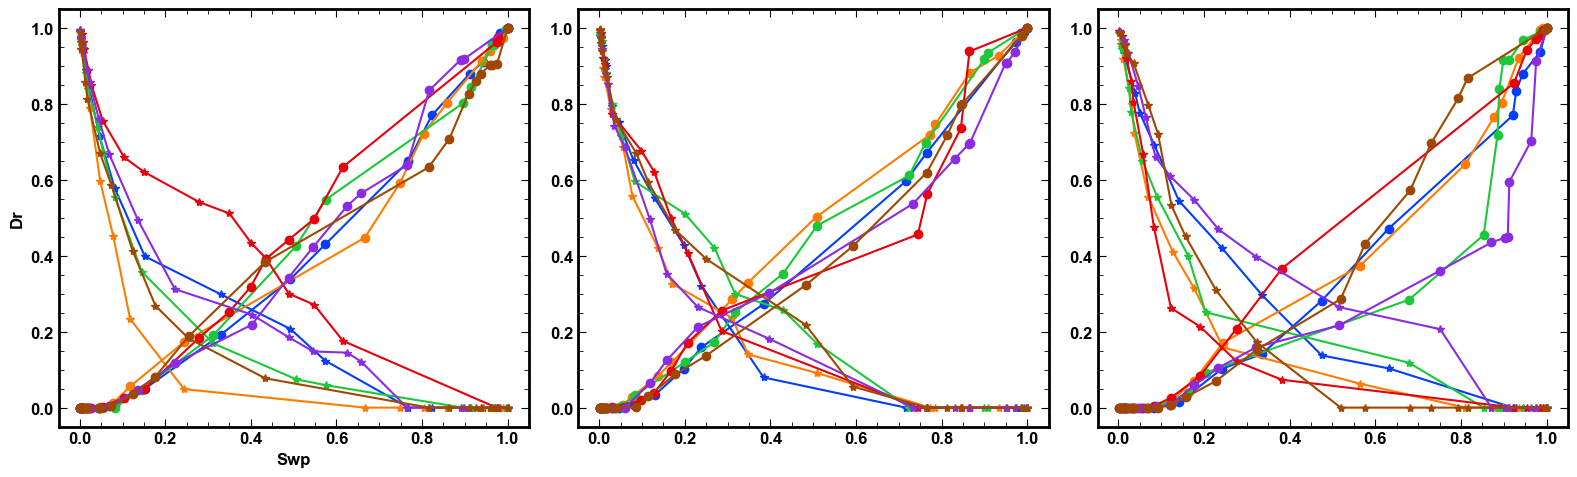

In [662]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,5))

colors = sns.color_palette('bright',6)


for r,region in enumerate(Snwparrs[0]):
    #pris
    ax1.plot(1-np.array(region), reldiffs_nwp[0][r], '*-', label='Dr_nwp', color=colors[r])
    ax1.plot(1-np.array(region), reldiffs_wp[0][r], 'o-', color=colors[r])


for r,region in enumerate(Snwparrs[1]):
    #uncomp?
    ax2.plot(1-np.array(region), reldiffs_nwp[1][r], '*-', label='Dr_nwp', color=colors[r])
    ax2.plot(1-np.array(region), reldiffs_wp[1][r], 'o-', color=colors[r])


for r,region in enumerate(Snwparrs[2]):
    #comp?
    ax3.plot(1-np.array(region), reldiffs_nwp[2][r], '*-', label='Dr_nwp', color=colors[r])
    ax3.plot(1-np.array(region), reldiffs_wp[2][r], 'o-', color=colors[r])



ax1.set_xlabel('Swp')
ax1.set_ylabel('Dr')
# ax.title('Relative Diffusivity in x direction')
# ax1.legend()
plt.show()

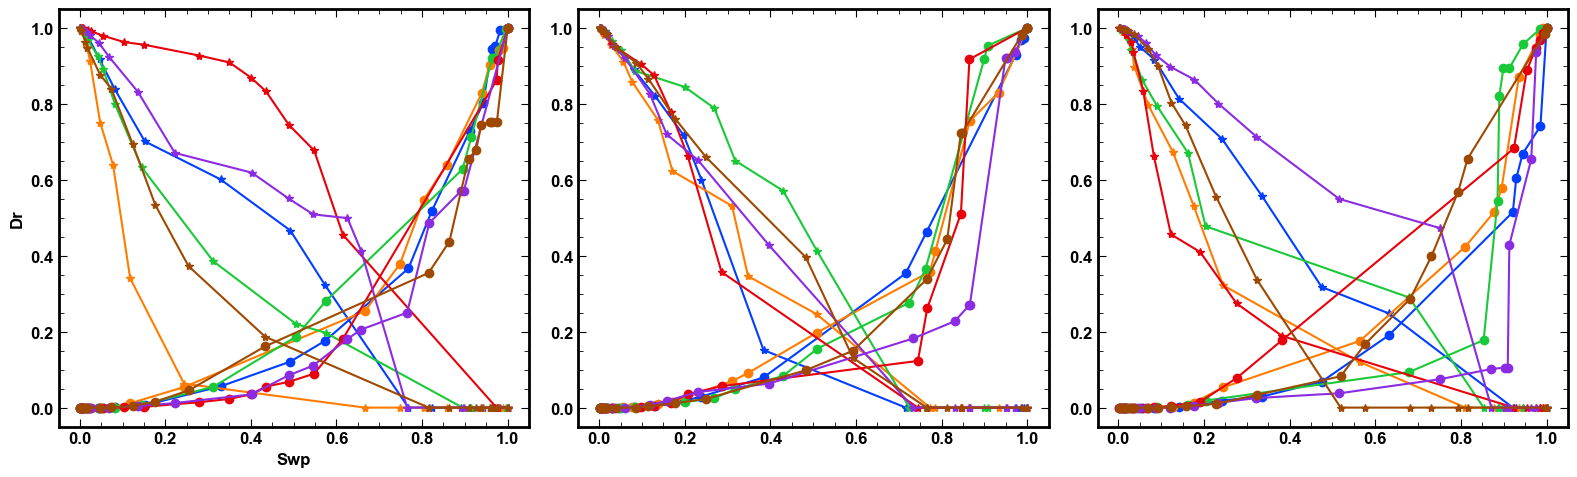

In [663]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,5))

colors = sns.color_palette('bright',6)



for r,region in enumerate(Snwparrs[0]):
    #pris
    ax1.plot(1-np.array(region), relperms_nwp[0][r], '*-', label='Dr_nwp', color=colors[r])
    ax1.plot(1-np.array(region), relperms_wp[0][r], 'o-', color=colors[r])


for r,region in enumerate(Snwparrs[1]):
    #uncomp?
    ax2.plot(1-np.array(region), relperms_nwp[1][r], '*-', label='Dr_nwp', color=colors[r])
    ax2.plot(1-np.array(region), relperms_wp[1][r], 'o-', color=colors[r])


for r,region in enumerate(Snwparrs[2]):
    #comp?
    ax3.plot(1-np.array(region), relperms_nwp[2][r], '*-', label='Dr_nwp', color=colors[r])
    ax3.plot(1-np.array(region), relperms_wp[2][r], 'o-', color=colors[r])



ax1.set_xlabel('Swp')
ax1.set_ylabel('Dr')
# ax.title('Relative Permeability in x direction')
# ax1.legend()
plt.show()

# Relative diffusivity and permeability curves - old

In [916]:
#Create OpenPNM project objects
pn_solid = []
pn_void = []

for x in snow_solid:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y.network))
    pn_solid.append(pn_temp)
    
for x in snow_void:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y.network))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [917]:
for s,sample in enumerate(pn_total[1]):
    for r,region in enumerate(sample):
        h = op.utils.check_network_health(region)
        # print(h)

        op.topotools.trim(network=region, pores=h['disconnected_pores'])
        h = op.utils.check_network_health(region)
        region.regenerate_models()
        # print(h)

        region['pore.diameter'] = region['pore.extended_diameter']
        region['throat.diameter'] = region['throat.inscribed_diameter']

        conduit_lengths = op.models.geometry.conduit_lengths.spheres_and_cylinders(region)
        region['throat.length'] = conduit_lengths[:,1]

        region['pore.volume'] = op.models.geometry.pore_volume.sphere(region,pore_diameter='pore.equivalent_diameter')
        region['throat.volume'] = op.models.geometry.throat_volume.cylinder(region,throat_diameter='throat.diameter',throat_length='throat.length')



In [918]:
def sat_update(network, nwp, wp):
    r"""
        Calculates the saturation of each phase using occupancy information from ordinary percolation.
        Parameters
        ----------
        network: network
        nwp : phase
            non-wetting phase
        wp : phase
            wetting phase
    """
    pore_mask = nwp["pore.occupancy"] == 1
    throat_mask = nwp["throat.occupancy"] == 1
    sat_p = np.sum(network['pore.volume'][pore_mask])
    sat_t = np.sum(network['throat.volume'][throat_mask])
    sat1 = sat_p + sat_t
    bulk = network['pore.volume'].sum() + network['throat.volume'].sum()
    sat = sat1/bulk
    return sat

In [919]:
def Rate_calc_diff(network, phase, inlet, outlet, conductance):
    phase.regenerate_models()
    Fd = op.algorithms.FickianDiffusion(network=network, phase=phase)
    Fd.settings._update({'conductance' : conductance})
    Fd.set_value_BC(pores=inlet, values=1)
    Fd.set_value_BC(pores=outlet, values=0)
    Fd.run()
    val = np.abs(Fd.rate(pores=inlet, mode='group'))
    return val

In [920]:
def Rate_calc_perm(network, phase, inlet, outlet, conductance):
    phase.regenerate_models()
    St_p = op.algorithms.StokesFlow(network=network, phase=phase)
    St_p.settings._update({'conductance' : conductance})
    St_p.set_value_BC(pores=inlet, values=1)
    St_p.set_value_BC(pores=outlet, values=0)
    St_p.run()
    val = np.abs(St_p.rate(pores=inlet, mode='group'))
    return val

In [ ]:
test_region = pn_total[1][0][1]
# print(test_region)

test_region.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)
test_region['pore.diffusivity'] = 1
test_region.regenerate_models()


air = op.phase.Species(network=test_region,species='oxygen', name='air')
air['pore.diffusivity'] = 2.4e-9
air['pore.viscosity'] = 20.55e-6
air['throat.surface_tension'] = 0.072
air['throat.contact_angle'] = 180
air.add_model_collection(op.models.collections.physics.basic)
air.regenerate_models()

water = op.phase.Water(network=test_region,name='water')
water['pore.diffusivity'] = 1e-9
water['throat.diffusivity'] = 1e-9
water['throat.surface_tension'] = 0.072
water['throat.contact_angle'] = 80
water.add_model('throat.entry_pressure',model=op.models.physics.capillary_pressure.washburn)
water.add_model_collection(op.models.collections.phase.water)
water.add_model_collection(op.models.collections.physics.basic)
water.regenerate_models()

print(air['throat.entry_pressure'])

#this works, above doesnt
air = op.phase.Phase(network=test_region,name='air')
air['pore.surface_tension'] = 0.072
air['pore.contact_angle'] = 180.0
# air.add_model_collection(op.models.collections.phase.air)
air.add_model_collection(op.models.collections.physics.basic)
air.regenerate_models()
water = op.phase.Water(network=test_region,name='water')
water['pore.diffusivity'] = 1e-9
water.add_model_collection(op.models.collections.phase.water)
water.add_model_collection(op.models.collections.physics.basic)
water.regenerate_models()

print(air['throat.entry_pressure'])

# test_region['throat.diffusive_size_factors'] = op.models.geometry.diffusive_size_factors.spheres_and_cylinders(test_region)
# test_region['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive()
# test_region['throat.hydraulic_conductance'] = op.models.physics.hydraulic_conductance.generic_hydraulic(phase)

op.algorithms.Drainage(network=test_region,phase=water).reset()
drn = op.algorithms.Drainage(network=test_region, phase=water)
drn.set_inlet_BC(test_region.pores('ymin'))
drn.run()

[01:36:44] WARNING  air is already taken, using air_39 instead                                      ]8;id=323549;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=915000;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  water is already taken, using water_38 instead                                  ]8;id=386282;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=644792;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

[5.3218e+07 5.3218e+07 5.3218e+07 ... 1.0408e+08 9.7029e+07 1.2954e+08]


Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

In [975]:
print(drn)


══════════════════════════════════════════════════════════════════════════════
drainage_45 : <openpnm.algorithms.Drainage at 0x19aec7ab0>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.invasion_pressure                                        1658 / 1658
  3  throat.invasion_pressure                                      3397 / 3397
  4  pore.invasion_sequence                                        1658 / 1658
  5  throat.invasion_sequence                                      3397 / 3397
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                          

In [944]:
water['pore.occupancy'] = drn['pore.invasion_pressure'] < 10000
water['throat.occupancy'] = drn['throat.invasion_pressure'] < 10000
air['pore.occupancy'] = 1 - water['pore.occupancy']
air['throat.occupancy'] = 1 - water['throat.occupancy']

In [945]:
diff_in = test_region.pores('ymin')
diff_out = test_region.pores('ymax')

In [946]:

model_mp_cond = op.models.physics.multiphase.conduit_conductance
air.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
              throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')
water.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
              throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')
air.add_model(model=model_mp_cond, propname='throat.conduit_hydraulic_conductance',
              throat_conductance='throat.hydraulic_conductance', mode='medium', regen_mode='deferred')
water.add_model(model=model_mp_cond, propname='throat.conduit_hydraulic_conductance',
              throat_conductance='throat.hydraulic_conductance', mode='medium', regen_mode='deferred')

In [947]:
Snwparr = []
reldiff_nwp = []
reldiff_wp = []

relperm_nwp = []
relperm_wp = []
for Pc in np.unique(drn['pore.invasion_pressure']):
    water['pore.occupancy'] = drn['pore.invasion_pressure'] < Pc
    water['throat.occupancy'] = drn['throat.invasion_pressure'] < Pc
    air['pore.occupancy'] = 1 - water['pore.occupancy']
    air['throat.occupancy'] = 1 - water['throat.occupancy']
    air.regenerate_models()
    water.regenerate_models()
    sat_point = sat_update(test_region, water, air)
    Snwparr.append(sat_point)
    Rate_single_nwp = Rate_calc_diff(test_region, air, diff_in, diff_out, conductance = 'throat.diffusive_conductance')
    Rate_single_wp = Rate_calc_diff(test_region, water, diff_in, diff_out, conductance = 'throat.diffusive_conductance')
    Rate_mult_nwp = Rate_calc_diff(test_region, air, diff_in, diff_out, conductance = 'throat.conduit_diffusive_conductance')
    Rate_mult_wp = Rate_calc_diff(test_region, water, diff_in, diff_out, conductance = 'throat.conduit_diffusive_conductance')
    reldiff_nwp.append(Rate_mult_nwp/Rate_single_nwp)
    reldiff_wp.append(Rate_mult_wp/Rate_single_wp)


    Rate_p_single_nwp = Rate_calc_perm(test_region, air, diff_in, diff_out, conductance = 'throat.hydraulic_conductance')
    Rate_p_single_wp = Rate_calc_perm(test_region, water, diff_in, diff_out, conductance = 'throat.hydraulic_conductance')
    Rate_p_mult_nwp = Rate_calc_perm(test_region, air, diff_in, diff_out, conductance = 'throat.conduit_hydraulic_conductance')
    Rate_p_mult_wp = Rate_calc_perm(test_region, water, diff_in, diff_out, conductance = 'throat.conduit_hydraulic_conductance')
    relperm_nwp.append(Rate_p_mult_nwp/Rate_p_single_nwp)
    relperm_wp.append(Rate_p_mult_wp/Rate_p_single_wp)

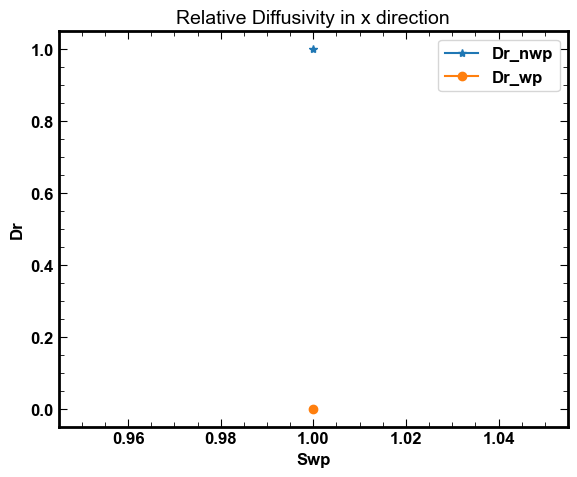

In [948]:
plt.figure(figsize=[6,5])
plt.plot(1-np.array(Snwparr), reldiff_nwp, '*-', label='Dr_nwp')
plt.plot(1-np.array(Snwparr), reldiff_wp, 'o-', label='Dr_wp')
plt.xlabel('Swp')
plt.ylabel('Dr')
plt.title('Relative Diffusivity in x direction')
plt.legend()

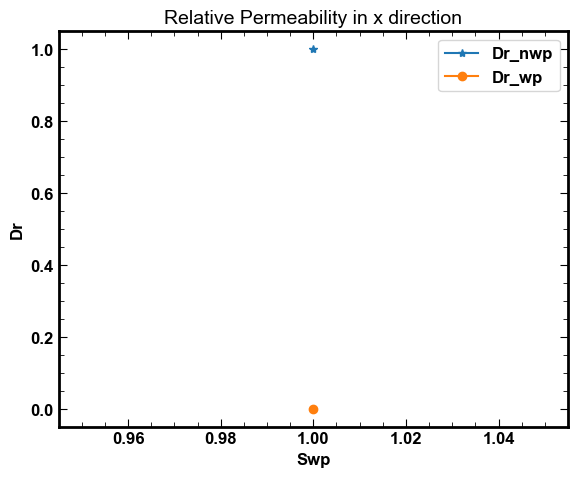

In [949]:
plt.figure(figsize=[6,5])
plt.plot(1-np.array(Snwparr), relperm_nwp, '*-', label='Dr_nwp')
plt.plot(1-np.array(Snwparr), relperm_wp, 'o-', label='Dr_wp')
plt.xlabel('Swp')
plt.ylabel('Dr')
plt.title('Relative Permeability in x direction')
plt.legend()